In [493]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from math import sqrt

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.decomposition import FactorAnalysis

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression, SelectFromModel, RFE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SequentialFeatureSelector

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 50)
pd.set_option('display.expand_frame_repr', False) 

In [494]:
# verisetini yüklemek için bu pakaeti yüklemeliyiz
# pip install ucimlrepo

In [495]:
# Heart disease verisetini import etmek için bu kodları kullanıyoruz.
from ucimlrepo import fetch_ucirepo 

# 45 numaralı veriseti Heart disease verisetini temsil ediyor ve verisetini getirme işlemini yapıyor.
heart_disease = fetch_ucirepo(id=45) 
  
# verisetini pandasın okuyacağı şekle çeviriyor.
data_from_uci = heart_disease.data.original

In [496]:
#verisetini data değişkenine atıyoruz
data_original = pd.DataFrame(data=data_from_uci)

In [497]:
#veriyi üzerinde yaptığımız değişikliklerden etkilenmemek için bir kopya oluşturuyoruz.
data=data_original.copy()

In [498]:
#önce verisetimizin özelliklerine bakalım
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [499]:
# 303 satırdan oluşan bir verisetimiz var ve görüldüğü üzere bazı verilerimiz eksik. 
# verilerimiz sayısal değerlerden oluşuyor fakat aralarında kategorik değişkenler olabilir
# 14 değişkenimiz var
# değişkenlerin isimlerini analşılablir oalcak şeklide değiştireceğiz
# değişkenler için açıklama ekleyeceğiz
# hangi değişkenlerde eksik veri varsa tespit edip uygun bir yöntem seçip dolduracağız
# verilerin ortalama, standart sapma, max ve min igib değerlerine bakacağız

In [500]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [501]:
#değişken isimlerini okunaklı olacak şeklide yenileriyle değiştiriyoruz
kolonlar=["yaş", 
          "cinsiyet",#1 erkek, 0 kadın
          "göğüs_ağrısı", # 1 -4 arası
          "tansiyon", 
          "kolesterol",
          "açlık_kan_şekeri", # 120 den büyükse 1 değilse 0 
          "ekg_sonucu", # 1-3 arası
          "maksimum_kalp_hızı", 
          "anjina", #  fiziksel aktivite sırasında veya stres altındayken ortaya çıkan göğüs ağrısı veya rahatsızlıktır. 
          "st_depresyonu",
          "slope", # st depresyonu ile ilgili bir terim
          "damar_sayısı", # 0-3 arası
          "talasemi", #  kalıtsal bir kan hastalığıdır.3 normal, 6 sabit kusur, 7 tersine çevirilebilir kusur. 3-6-7
          "tahmin" ] # 0 ile 4 arasında değer alır, 0 yok, 1-4 arasındaki değerler ise derecelere göre hastalığı gösterir
data.columns=kolonlar

In [502]:
data.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [503]:
# değişkenlerimizi düzenledik ve daha okunaklı oldu, görselleştirme yaparken verileri daha iyi okuyabiliriz

In [504]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yaş,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
cinsiyet,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
göğüs_ağrısı,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
tansiyon,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
kolesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
açlık_kan_şekeri,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ekg_sonucu,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
maksimum_kalp_hızı,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
anjina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depresyonu,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [505]:
# yaş değişkeninde genellikle ortayaş üstü kişiler var
# erkeklerin sayısı kadınlardan daha fazla
# tansiyon değerleri genellkle yüksek
# kan şekeri değeri düşük seviyede
# talasemi değeri için bir yorumda bulunamıyoruz çünkü  3,6 ve 7 değerleri almış sadece. bu değerleri 0,1,2 olarak değiştireceğiz
# ayrkırı değer oluşturacak bir durum görünmüyor ama kontrol edeceğiz ileride.

In [506]:
talasemi_map = {3: 1, 6: 2, 7: 3}
data['talasemi'] = data['talasemi'].map(talasemi_map)

In [507]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yaş,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
cinsiyet,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
göğüs_ağrısı,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
tansiyon,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
kolesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
açlık_kan_şekeri,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ekg_sonucu,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
maksimum_kalp_hızı,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
anjina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depresyonu,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [508]:
# kopya değer var mı kontrol ediyoruz
data.duplicated().sum()

0

In [509]:
# tahmin değişkeni 0 ie 4 aralığında fakat tahmin değerini 1 ve 0 arasında olmasını istiyoruz.
# bu sebepten dolayı 0 olan değerleri 0, 1-4 değerlerini 1 yapacağız.

#tahmin gruplarını belirleyelim
def transform_value(x):
    if x == 0:
        return 0
    else:
        return 1

# Dönüşüm fonksiyonunu 'values' sütununa uygulayın
data['tahmin'] = data['tahmin'].apply(transform_value)

In [510]:
data.isnull().sum()

yaş                   0
cinsiyet              0
göğüs_ağrısı          0
tansiyon              0
kolesterol            0
açlık_kan_şekeri      0
ekg_sonucu            0
maksimum_kalp_hızı    0
anjina                0
st_depresyonu         0
slope                 0
damar_sayısı          4
talasemi              2
tahmin                0
dtype: int64

In [511]:
# damar_sayısı ve talasemi değişkenlerinde eksik veriler var, bu değişkenleri inceleyip uygun bir şeklide dolduracağız ya da sileceğiz.
# talasemi ve damar_sayısı değişkenlerinin hangi satırlarında eksik veriler olduğuna bakalım

In [512]:
data[data["talasemi"].isnull()]

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1


In [513]:
data[data["damar_sayısı"].isnull()]

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,1.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,3.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,3.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,1.0,0


In [514]:
# görüldüğü üzere boş değre sahip olan satırların hepsi ayrı ayrı kişilere ait.
# kişişlerin verilerini karşılaştırıp bir şablon oluşturmak zor görünüyor.
# boş değişken değerlerinin en çok hangi değişkenden etkilendiğine bakarsak boş verileri doldurmak için bir fikir elde edebiliriz.
# bunu heatmap ile görmeye çalışalım 

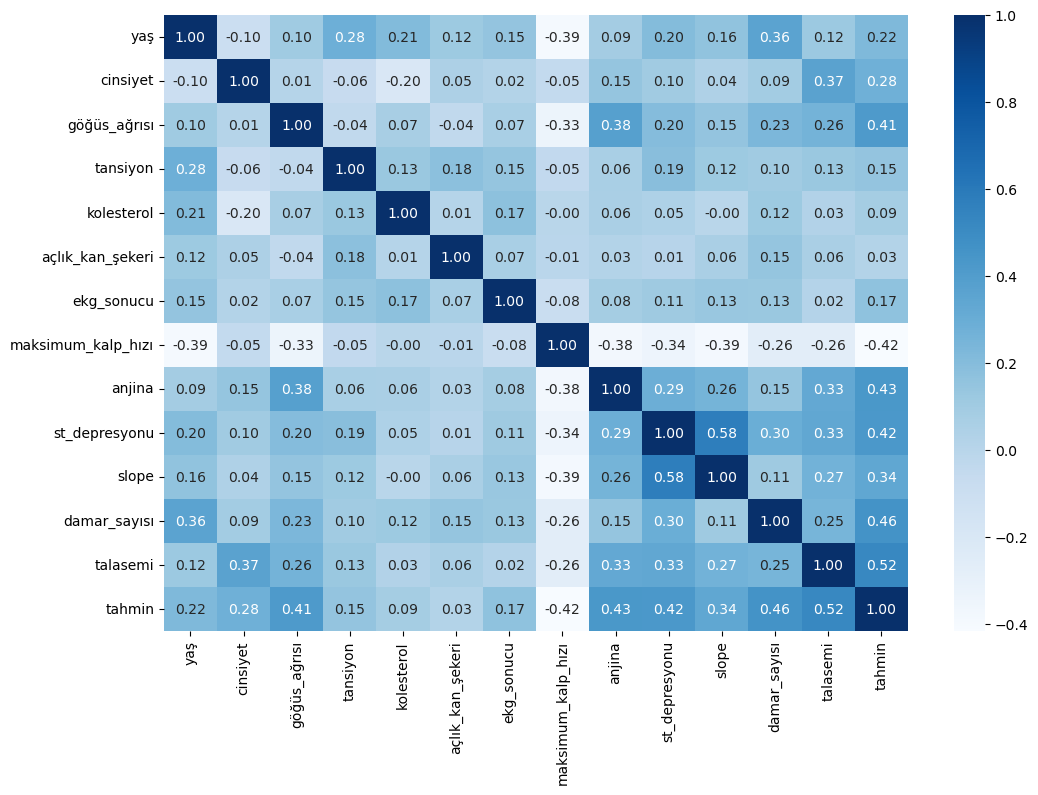

In [515]:
corr_matrix=data.corr(numeric_only = True)
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr_matrix, annot=True,  fmt = ".2f", cmap='Blues')

In [516]:
data["cinsiyet"].value_counts()

cinsiyet
1    206
0     97
Name: count, dtype: int64

In [517]:
# eksik verileri doldurmak için bir mantık oluşturamadım. 
# cinsiyet olarak bakarsak, 1 tane kadın 5 tane erkek için, 97 kadından 1 tanesini silmek veriyi etkilemeyeceğini düşünüyorum
# 206 erkekten ise 5 kişiyi silmek yine veriyi çok etkilemeyecektir.
# aşağıda bir yüzde hesabı yapalım

In [518]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data / data.shape[0]) * 100

missing_data_filtered = missing_data[missing_data > 0]
missing_percentage_filtered = missing_percentage[missing_data > 0]

missing_data_table = pd.DataFrame({
    'Sütun Adı': missing_data_filtered.index,
    'Eksik Değer Sayısı': missing_data_filtered.values,
    'Eksik Değerlerin Yüzdesi (%)': missing_percentage_filtered.values
})

print(missing_data_table)

      Sütun Adı  Eksik Değer Sayısı  Eksik Değerlerin Yüzdesi (%)
0  damar_sayısı                   4                      1.320132
1      talasemi                   2                      0.660066


In [293]:
# yüzde hesabına baktığımızda eksik verileri silersek veri kaybı çok çok az olacaktır.
# daha sonra boş verileri median ve ortalama değer ile doldurup ne kadar faklı sonuç alacağımıza bakacağız.
# sonuca ulaşmak için verileri silme yoluna gideceğiz

! veriler üzerinde çalışırken yaptığımız değişikliklere tekrardan bakma durumunda kalıyoruz ve verisetini en baştan yüklemek gerekiyor. bunu engellemek için veriler üzerinde değişiklik yaptıktan sonra kopyasını oluşturup onunla devam edeceğiz.

In [519]:
data_dropna=data.copy()

In [520]:
data_dropna = data_dropna.dropna()

In [521]:
data_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yaş                 297 non-null    int64  
 1   cinsiyet            297 non-null    int64  
 2   göğüs_ağrısı        297 non-null    int64  
 3   tansiyon            297 non-null    int64  
 4   kolesterol          297 non-null    int64  
 5   açlık_kan_şekeri    297 non-null    int64  
 6   ekg_sonucu          297 non-null    int64  
 7   maksimum_kalp_hızı  297 non-null    int64  
 8   anjina              297 non-null    int64  
 9   st_depresyonu       297 non-null    float64
 10  slope               297 non-null    int64  
 11  damar_sayısı        297 non-null    float64
 12  talasemi            297 non-null    float64
 13  tahmin              297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [522]:
# damar_sayısı ve talasemi değerlerini integere çeviriyoruz
data_dropna['damar_sayısı'] = data_dropna['damar_sayısı'].astype(int)
data_dropna['talasemi'] = data_dropna['talasemi'].astype(int)

In [523]:
# ilk önce numerik ve kategorik değişkenleri tanımlayalım çünkü ileride kullancağız.

#num_col = ["yaş","tansiyon", "kolesterol","maksimum_kalp_hızı","st_depresyonu"]
#cat_col = ["cinsiyet","göğüs_ağrısı","ekg_sonucu","anjina","açlık_kan_şekeri","slope","damar_sayısı","talasemi"]


num_col = ["yaş","tansiyon", "kolesterol","maksimum_kalp_hızı","st_depresyonu"]
cat_col = ["cinsiyet","göğüs_ağrısı","ekg_sonucu","anjina","açlık_kan_şekeri","slope","talasemi","damar_sayısı"]

In [524]:
# eksik verilerimiz sildik ve 297 adet verimiz var. Bu veriler üzerinden devam edeceğiz
# aykırı değere sahip olan değişkenlerimizi belirleyeceğiz. kategorik değişkenlerde aykırı değer aramıyoruz.

! veriler üzerinde çalışırken yaptığımız değişikliklere tekrardan bakma durumunda kalıyoruz ve veirsetini en baştan
yüklemek gerekiyor. bunu engellemek için veriler üzerinde değişiklik yaptıktan sonra kopyasını oluşturup onunla devam edeceğiz.

In [525]:
data_outlier=data_dropna.copy()

In [526]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yaş                 297 non-null    int64  
 1   cinsiyet            297 non-null    int64  
 2   göğüs_ağrısı        297 non-null    int64  
 3   tansiyon            297 non-null    int64  
 4   kolesterol          297 non-null    int64  
 5   açlık_kan_şekeri    297 non-null    int64  
 6   ekg_sonucu          297 non-null    int64  
 7   maksimum_kalp_hızı  297 non-null    int64  
 8   anjina              297 non-null    int64  
 9   st_depresyonu       297 non-null    float64
 10  slope               297 non-null    int64  
 11  damar_sayısı        297 non-null    int32  
 12  talasemi            297 non-null    int32  
 13  tahmin              297 non-null    int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 32.5 KB


In [527]:
# yaş, kolesterol ve taalasemi değerlerini integere çeviriyoruz
data_outlier['yaş'] = data_outlier['yaş'].astype(int)
data_outlier['kolesterol'] = data_outlier['kolesterol'].astype(int)
data_outlier['talasemi'] = data_outlier['talasemi'].astype(int)

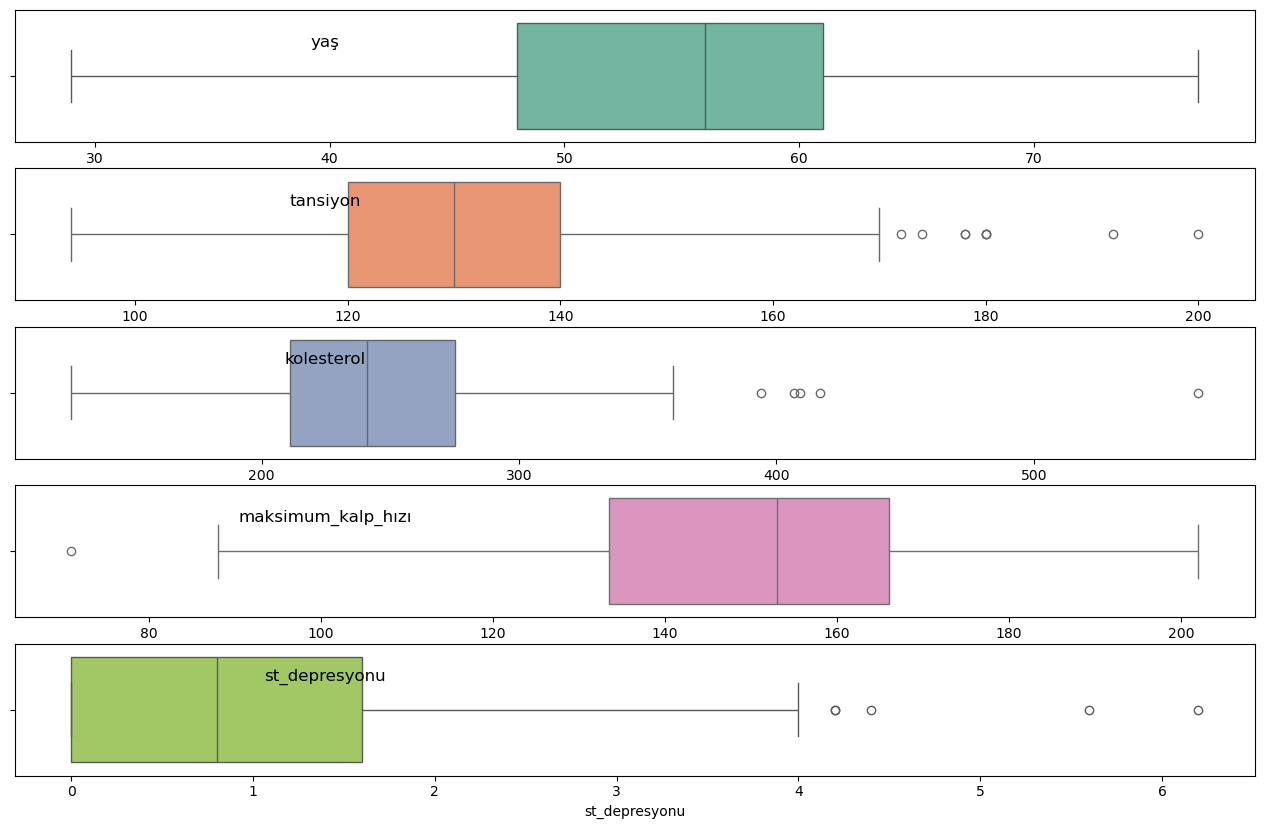

In [528]:
def plot_boxplots(data_outlier, features):
    colors = sns.color_palette("Set2", n_colors=7)

    plt.figure(figsize=(16, 12))

    for i, feature in enumerate(features, start=1):
        ax=plt.subplot(6, 1,i)
        sns.boxplot(data=data, x=feature, ax=ax,color=colors[i-1])
        #plt.title(feature, pad=25)
        ax.text(0.25, 0.75, feature, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)    
    plt.show()

plot_boxplots(data, num_col)

In [529]:
# grafikte görüldüğü üzere tansiyon, kolsetrol ve maksimum kalp atış hızında aykırı değerlerimiz mevcut.
# aykırı değerleri sırasıyla değerlendirelim
# tansiyon değişkeninde 170 den sonra aykır değerler görüyoruz, 170 tansiyon değeri çok yüksek bir değer.
# normalde 120 dan sonrası tehlikli olduğu kabul edilir. buradaki aykırı değerleri gözden geçireceğiz
# kolstrol değişkeninde ise 400 civarlarında aykırı değerler bulunmakta. 
# ayrıca 550 civarında bir aykır değer daha var. ortalama ve standart sapmaya baktığımızda bu aykırı değerleride gözden geçirmeliyiz.
# maksimum kalp atış hızında da aykırı değer görünmekte. makisimum kalp atış hızının 70 civarında olması pek olası bir durum değil
# bu değişkene de göz atacağız

# aykırı değişkenleri silmek yerine eşik değerler ile değiştirme yoluna gideceğiz. çok fazla verimiz olmadığı için modele çok etki etmeyecektir.
# IQR yöntemi ile önce aykırı değerleri tespit edelim daha sonra eşik değerler ile aykırı değerleri değiştirelim.
# sınır değerleri normalde 0.25 ile 0.75 olarak hesaba katılıyor. bu değerleri verieye göre değiştrebiliriz.

In [530]:
# Aykırı değerleri olan sütunları true ya da false olarak listeleyeceğiz.
# Bütün değişkenler içerisinde aykırı değerleri tespit edebiliriz ama bunu numerik değişkenler arasında yapacağız
# daha sonra aykırı değere sahip değişkenleri ayrı değerlendireceğiz

def aykırı_deger_tespiti(data_outlier, num_col):
    # Aykırı değerlerin olduğu sütunları belirlemek için bir sözlük oluşturur
    aykırı_değer_durum = {}
    
    for column in num_col:
        if column in data_outlier.columns:
            Q1 = data_outlier[column].quantile(0.25)
            Q3 = data_outlier[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Aykırı değerlerin olup olmadığını kontrol eder
            aykırı_değerler = any((data_outlier[column] < lower_bound) | (data_outlier[column] > upper_bound))
            aykırı_değer_durum[column] = {
                'Aykırı Değer Durumu': aykırı_değerler,
                'Alt Limit': lower_bound,
                'Üst Limit': upper_bound
            }

    return aykırı_değer_durum

aykırı_değerler = aykırı_deger_tespiti(data_outlier, num_col)
# Aykırı değer durumu tablosunu oluşturma
aykırı_değerler_durum_listesi = pd.DataFrame.from_dict(aykırı_değerler, orient='index')
aykırı_değerler_durum_listesi

,Aykırı Değer Durumu,Alt Limit,Üst Limit
yaş,False,28.5,80.5
tansiyon,True,90.0,170.0
kolesterol,True,113.5,373.5
maksimum_kalp_hızı,True,83.5,215.5
st_depresyonu,True,-2.4,4.0


In [531]:
# görüldüğü üzere tansiyon, kolesterol ve maksimum kalp atış hızında aykırı değerler olduğunu görüyoruz.
# bu değişenkenlerdeki aykırı değerleri alt veya üst limit değerleri ile değiştireceğiz.


In [532]:
# Aykırı değerlerin düzenlenmesi için limitler fonksiyonunu tanımlayalım
def limitler(data_outlier, col, q1=0.25, q3=0.75):
    quart1 = data_outlier[col].quantile(q1)
    quart3 = data_outlier[col].quantile(q3)
    inter_quart_range = quart3 - quart1
    up_limit = quart3 + 1.5 * inter_quart_range
    low_limit = quart1 - 1.5 * inter_quart_range    
    return up_limit, low_limit

# Birden fazla sütun için aykırı değerleri düzenleyen fonksiyon
def limit_duzenleme(data_outlier, cols):
    for col in cols:
        up_limit, low_limit = limitler(data_outlier, col)
        data_outlier.loc[(data_outlier[col] < low_limit), col] = low_limit
        data_outlier.loc[(data_outlier[col] > up_limit), col] = up_limit

limit_duzenleme(data_outlier, num_col)

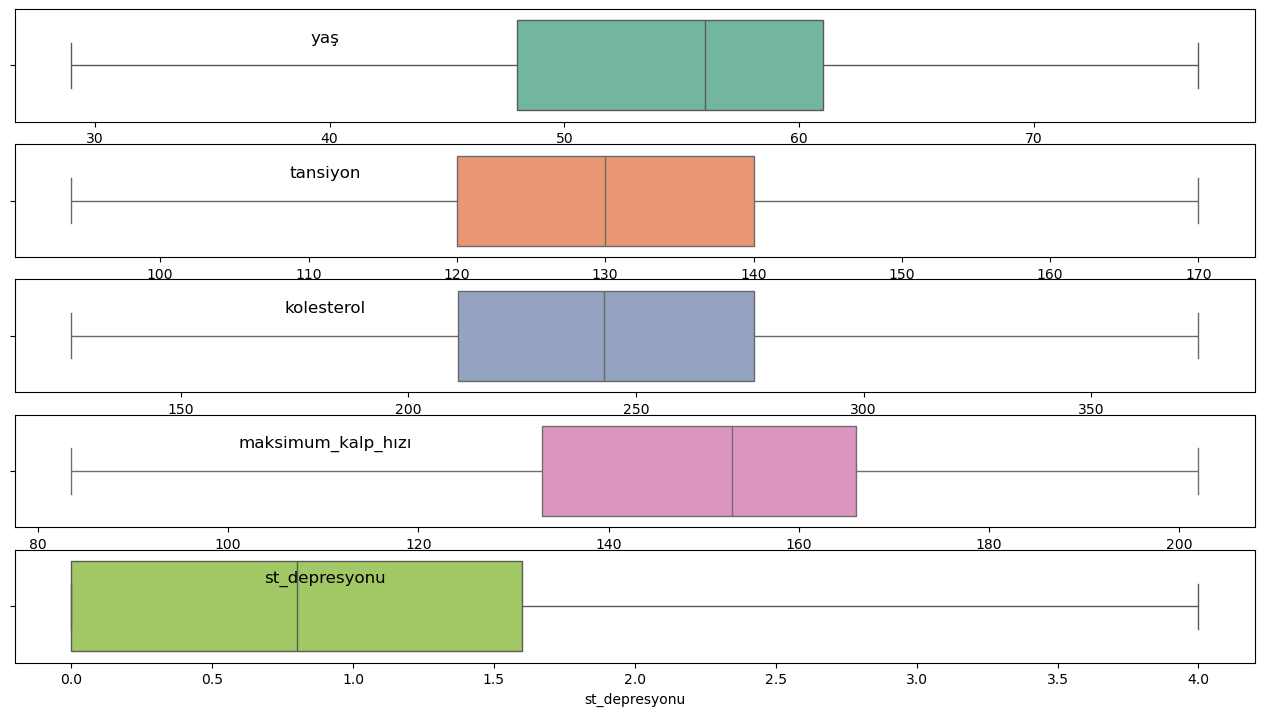

In [533]:
def plot_boxplots(data_outlier, features):
    colors = sns.color_palette("Set2", n_colors=6)

    plt.figure(figsize=(16, 12))

    for i, feature in enumerate(features, start=1):
        ax=plt.subplot(7, 1,i)
        sns.boxplot(data=data_outlier, x=feature, ax=ax,color=colors[i-1])
        #plt.title(feature, pad=25)
        ax.text(0.25, 0.75, feature, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)    
    plt.show()

plot_boxplots(data_outlier, num_col)

In [534]:
# Grafikte görüldüğü üzere alt ve üst limitler düzenledikten sonra aykırı değerimiz kalmadı.

In [535]:
data_outlier.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
0,63.0,1,1,145,233.0,1,2,150.0,0,2.3,3,0,2,0
1,67.0,1,4,160,286.0,0,2,108.0,1,1.5,2,3,1,1
2,67.0,1,4,120,229.0,0,2,129.0,1,2.6,2,2,3,1
3,37.0,1,3,130,250.0,0,0,187.0,0,3.5,3,0,1,0
4,41.0,0,2,130,204.0,0,2,172.0,0,1.4,1,0,1,0


In [536]:
data_gruplar=data_outlier.copy()

In [537]:
data_gruplar.sample(5)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
49,53.0,1,3,130,197.0,1,2,152.0,0,1.2,3,0,1,0
189,69.0,1,3,140,254.0,0,2,146.0,0,2.0,2,3,3,1
21,58.0,0,1,150,283.0,1,2,162.0,0,1.0,1,0,1,0
151,42.0,0,4,102,265.0,0,2,122.0,0,0.6,2,0,1,0
191,51.0,1,4,140,298.0,0,0,122.0,1,4.0,2,3,3,1


In [538]:
# yaşları gruplayarak yeni bir özellik oluşturalim

In [539]:
# Yaş gruplarını belirleme
def yaş_grubu(yaş):
    if yaş < 30:
        return 'genç'
    elif 30 <= yaş < 45:
        return 'yetişkin'
    elif 45 <= yaş < 60:
        return 'orta_yaşlı'
    elif 60 <= yaş < 75:
        return 'yaşlı'
    else:
        return 'çok_yaşlı'

data_gruplar['yaş_grubu'] = data_gruplar['yaş'].apply(yaş_grubu)

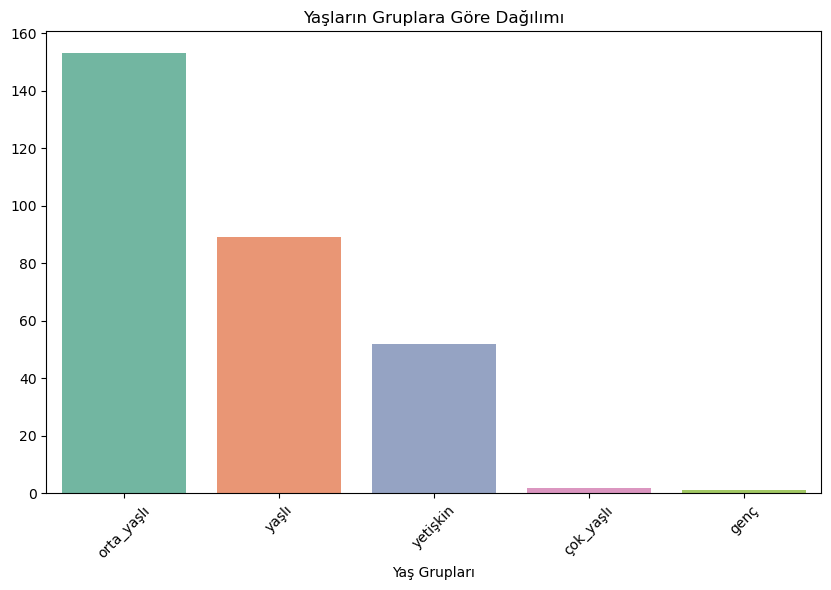

In [540]:
# Yaş gruplarının sayısını hesaplama
yaş_grubu_sayısı = data_gruplar['yaş_grubu'].value_counts()

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=yaş_grubu_sayısı.index, y=yaş_grubu_sayısı.values, palette='Set2')

plt.title('Yaşların Gruplara Göre Dağılımı')
plt.xlabel('Yaş Grupları')
plt.xticks(rotation=45)  # X eksenindeki etiketlerin döndürülmesi (isteğe bağlı)
plt.show()

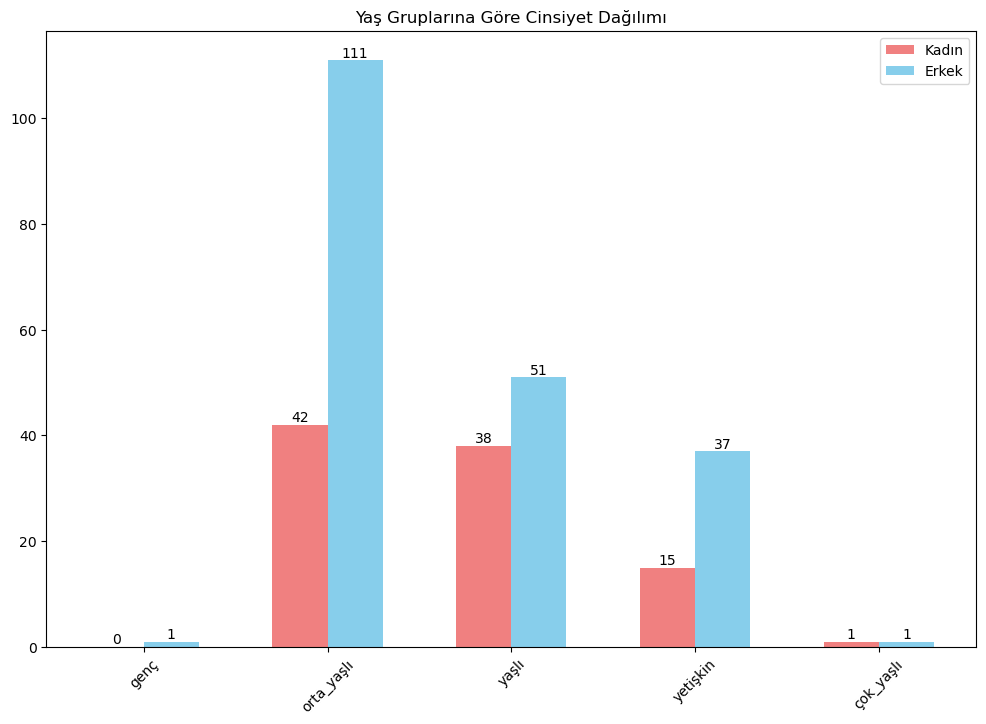

In [541]:
# bir grafik yardımı ile kadın ve erkeklerin hangi yaş grubunda olduklarını görelim.

# Yaş gruplarının ve cinsiyetlerin sayılarını bulalım
yaş_grubu_sayısı = data_gruplar.groupby(['yaş_grubu', 'cinsiyet']).size().unstack().fillna(0)

bar_width = 0.3
index = np.arange(len(yaş_grubu_sayısı))

# Çubuk grafiği oluşturalım
plt.figure(figsize=(12, 8))
bar1 = plt.bar(index - bar_width/2, yaş_grubu_sayısı[0], bar_width, label='Kadın', color='lightcoral')
bar2 = plt.bar(index + bar_width/2, yaş_grubu_sayısı[1], bar_width, label='Erkek', color='skyblue')

# Çubukların üzerine değerleri yazdırmalım
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Yaş Gruplarına Göre Cinsiyet Dağılımı')
plt.xticks(index, yaş_grubu_sayısı.index, rotation=45) 
plt.legend()
plt.show()

In [542]:
# Kolesterol düzeylerini belirli aralıklara göre kategorilere ayıralım

In [543]:
def kolesterol_düzeyi(kolesterol):
    if kolesterol < 200:
        return 'düşük'
    elif 200 <= kolesterol < 240:
        return 'normal'
    else:
        return 'yüksek'

data_gruplar['kolesterol_grubu'] = data_gruplar['kolesterol'].apply(kolesterol_düzeyi)

In [544]:
# tanisyon değerleri için belirli aralıklara göre kategorilere ayıralım

In [545]:
def tansiyon_düzeyi(tansiyon):
    if tansiyon < 90:
        return 'düşük'
    elif 90 <= tansiyon < 120:
        return 'normal'
    elif 120 <= tansiyon < 140:
        return 'yüksek tansiyon'
    elif 140 <= tansiyon < 160:
        return 'hipertansiyon evre 1'
    else:
        return 'hipertansiyon evre 2'

data_gruplar['tansiyon_grubu'] = data_gruplar['tansiyon'].apply(tansiyon_düzeyi)

In [546]:
data_gruplar.sample(3)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
189,69.0,1,3,140,254.0,0,2,146.0,0,2.0,2,3,3,1,yaşlı,yüksek,hipertansiyon evre 1
216,46.0,0,2,105,204.0,0,0,172.0,0,0.0,1,0,1,0,orta_yaşlı,normal,normal
40,65.0,0,4,150,225.0,0,2,114.0,0,1.0,2,3,3,1,yaşlı,normal,hipertansiyon evre 1


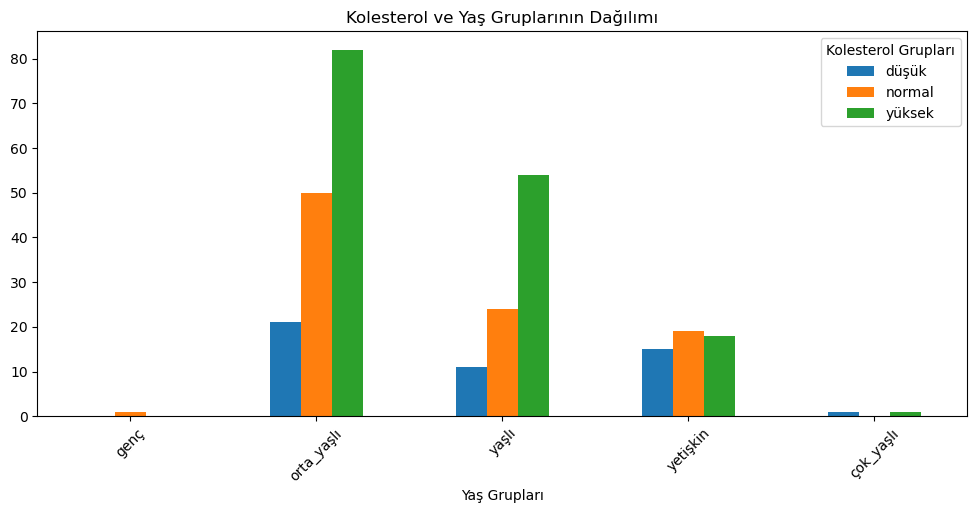

In [547]:
yaşa_bağlı_kolosterol_grubu = data_gruplar.groupby(["yaş_grubu","kolesterol_grubu"]).size().unstack().fillna(0)

yaşa_bağlı_kolosterol_grubu.plot(kind='bar', figsize=(12, 5))
plt.title('Kolesterol ve Yaş Gruplarının Dağılımı')
plt.xlabel('Yaş Grupları')
plt.xticks(rotation=45)
plt.legend(title='Kolesterol Grupları')
plt.show()

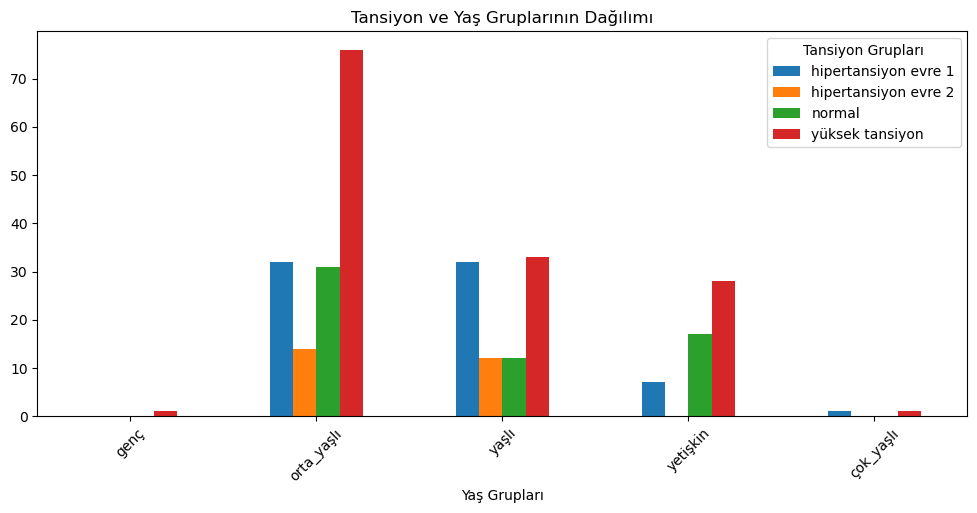

In [548]:
yaşa_bağlı_tansiyon_grubu = data_gruplar.groupby(["yaş_grubu","tansiyon_grubu"]).size().unstack().fillna(0)

yaşa_bağlı_tansiyon_grubu.plot(kind='bar', figsize=(12, 5))
plt.title('Tansiyon ve Yaş Gruplarının Dağılımı')
plt.xlabel('Yaş Grupları')
plt.xticks(rotation=45)
plt.legend(title='Tansiyon Grupları')
plt.show()

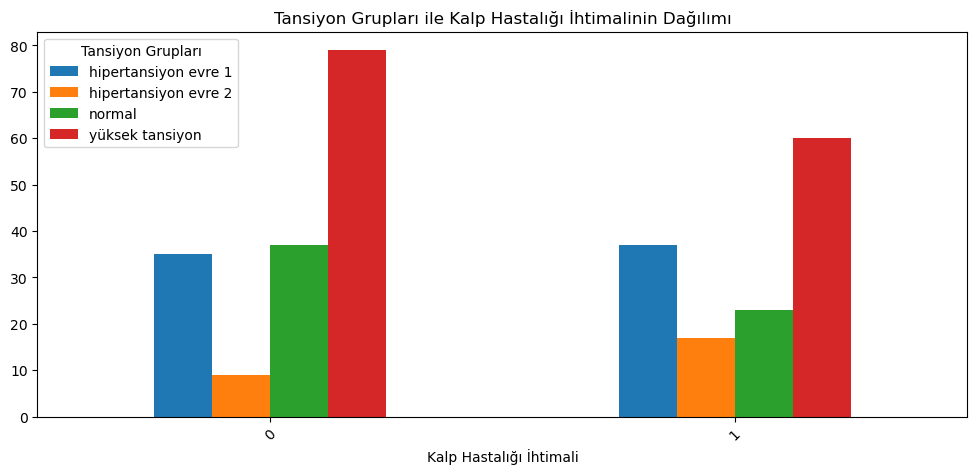

In [549]:
yaşa_bağlı_tansiyon_grubu = data_gruplar.groupby(["tahmin","tansiyon_grubu"]).size().unstack().fillna(0)

yaşa_bağlı_tansiyon_grubu.plot(kind='bar', figsize=(12, 5))
plt.title('Tansiyon Grupları ile Kalp Hastalığı İhtimalinin Dağılımı')
plt.xlabel('Kalp Hastalığı İhtimali')
plt.xticks(rotation=45)
plt.legend(title='Tansiyon Grupları')
plt.show()

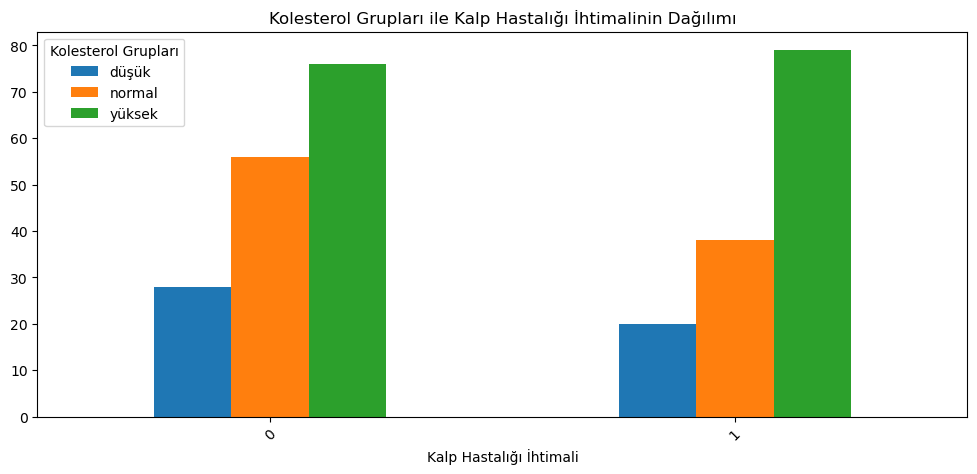

In [550]:
yaşa_bağlı_tansiyon_grubu = data_gruplar.groupby(["tahmin","kolesterol_grubu"]).size().unstack().fillna(0)

yaşa_bağlı_tansiyon_grubu.plot(kind='bar', figsize=(12, 5))
plt.title('Kolesterol Grupları ile Kalp Hastalığı İhtimalinin Dağılımı')
plt.xlabel('Kalp Hastalığı İhtimali')
plt.xticks(rotation=45)
plt.legend(title='Kolesterol Grupları')
plt.show()

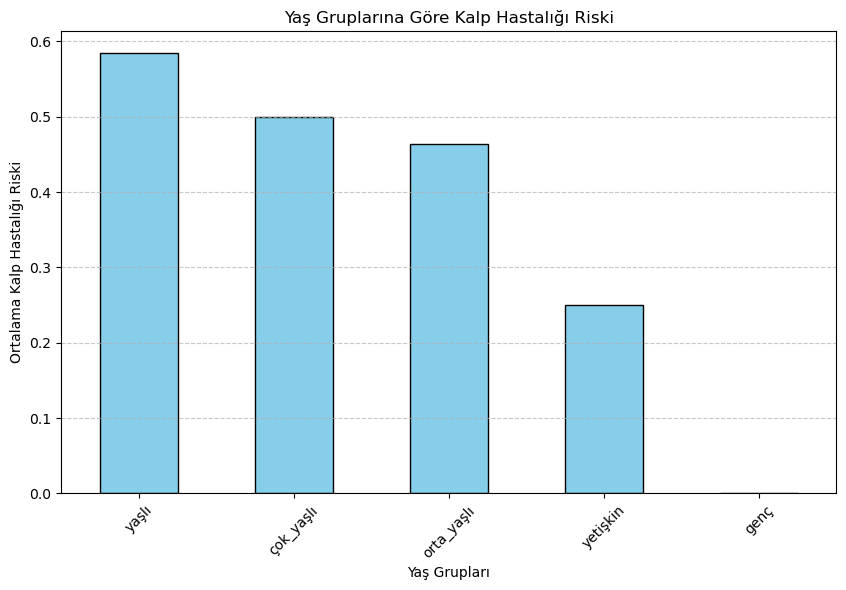

In [551]:
# Kalp hastalığı riski ile yaş gruplarını karşılaştıralım
yaşa_göre_kalp_hastalığı_riski = data_gruplar.groupby('yaş_grubu')['tahmin'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
yaşa_göre_kalp_hastalığı_riski.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Yaş Gruplarına Göre Kalp Hastalığı Riski')
plt.xlabel('Yaş Grupları')
plt.ylabel('Ortalama Kalp Hastalığı Riski')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [552]:
# buradaki çarpımları yeni değerleri bulup modelimizi eğitirken bize faydalı olup olmadığını görmke için ekliyoruz
data_gruplar['kolesterol_yaş_etkileşimi'] = (data_gruplar['kolesterol'] * data_gruplar['yaş'])
data_gruplar['tansiyon_yaş_etkileşimi'] = (data_gruplar['tansiyon'] * data_gruplar['yaş'])

In [553]:
data_gruplar.columns

Index(['yaş', 'cinsiyet', 'göğüs_ağrısı',
       'tansiyon', 'kolesterol',
       'açlık_kan_şekeri', 'ekg_sonucu',
       'maksimum_kalp_hızı', 'anjina',
       'st_depresyonu', 'slope', 'damar_sayısı',
       'talasemi', 'tahmin', 'yaş_grubu',
       'kolesterol_grubu', 'tansiyon_grubu',
       'kolesterol_yaş_etkileşimi',
       'tansiyon_yaş_etkileşimi'],
      dtype='object')

In [554]:
# yeni özelliklerin değerleri çok büyük olduğu için min-max normalizayonu yapacağız. 0 ile 1 arasında ölçeklendireceğiz.
# bu işlemler yerine  MinMaxScaler() kullanırsak aynı sonuçları elde ederiz.
ky_min_value = data_gruplar['kolesterol_yaş_etkileşimi'].min()
ky_max_value = data_gruplar['kolesterol_yaş_etkileşimi'].max()
ty_min_value = data_gruplar['tansiyon_yaş_etkileşimi'].min()
ty_max_value = data_gruplar['tansiyon_yaş_etkileşimi'].max()
data_gruplar['kolesterol_yaş_etkileşimi'] = (data_gruplar['kolesterol_yaş_etkileşimi'] - ky_min_value) / (ky_max_value - ky_min_value)
data_gruplar['tansiyon_yaş_etkileşimi'] = (data_gruplar['tansiyon_yaş_etkileşimi'] - ty_min_value) / (ty_max_value - ty_min_value)


In [555]:
data_gruplar.head(10)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu,kolesterol_yaş_etkileşimi,tansiyon_yaş_etkileşimi
0,63.0,1,1,145,233.0,1,2,150.0,0,2.3,3,0,2,0,yaşlı,normal,hipertansiyon evre 1,0.458592,0.692805
1,67.0,1,4,160,286.0,0,2,108.0,1,1.5,2,3,1,1,yaşlı,yüksek,hipertansiyon evre 2,0.693199,0.893590
2,67.0,1,4,120,229.0,0,2,129.0,1,2.6,2,2,3,1,yaşlı,normal,yüksek tansiyon,0.493341,0.554092
3,37.0,1,3,130,250.0,0,0,187.0,0,3.5,3,0,1,0,yetişkin,yüksek,yüksek tansiyon,0.174477,0.144920
4,41.0,0,2,130,204.0,0,2,172.0,0,1.4,1,0,1,0,yetişkin,normal,yüksek tansiyon,0.128111,0.210793
5,56.0,1,2,120,236.0,0,0,178.0,0,0.8,1,0,1,0,orta_yaşlı,normal,yüksek tansiyon,0.382029,0.386876
6,62.0,0,4,140,268.0,0,2,160.0,0,3.6,3,2,1,1,yaşlı,yüksek,hipertansiyon evre 1,0.559960,0.635166
7,57.0,0,4,120,354.0,0,0,163.0,1,0.6,1,0,1,0,orta_yaşlı,yüksek,yüksek tansiyon,0.746369,0.402078
8,63.0,1,4,130,254.0,0,2,147.0,0,1.4,2,1,3,1,yaşlı,yüksek,yüksek tansiyon,0.527828,0.573093
9,53.0,1,4,140,203.0,1,2,155.0,1,3.1,3,0,3,1,orta_yaşlı,normal,hipertansiyon evre 1,0.253447,0.475551


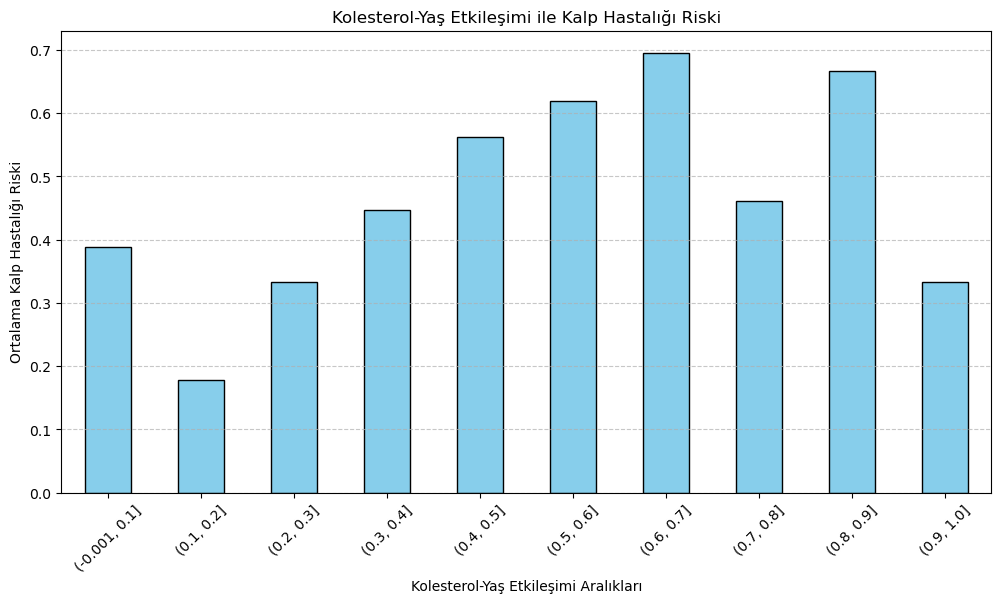

In [556]:
# `kolestrol_yaş_oranı` değer aralıklarına göre gruplama
data_gruplar['kolesterol_yaş_etkileşimi_grubu'] = pd.cut(data_gruplar['kolesterol_yaş_etkileşimi'], bins=10)

# Her grup için ortalama kalp hastalığı riski hesaplama
ky_risk_oranı = data_gruplar.groupby('kolesterol_yaş_etkileşimi_grubu')['tahmin'].mean()

# Çubuk grafiği oluşturma
plt.figure(figsize=(12, 6))
ky_risk_oranı.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Kolesterol-Yaş Etkileşimi ile Kalp Hastalığı Riski')
plt.xlabel('Kolesterol-Yaş Etkileşimi Aralıkları')
plt.ylabel('Ortalama Kalp Hastalığı Riski')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

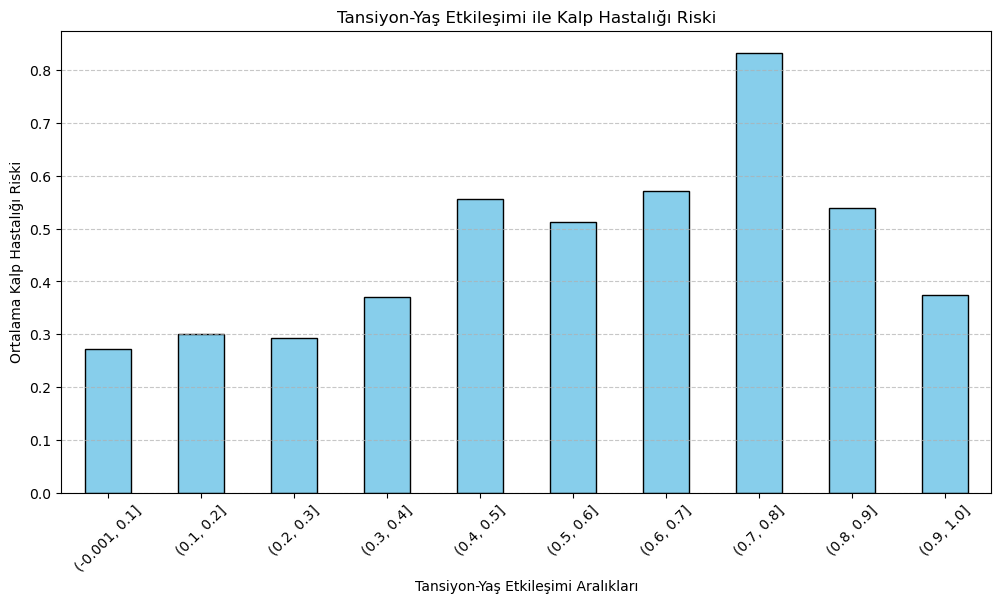

In [557]:
# `tansiyon_yaş_oranı` değer aralıklarına göre gruplama
data_gruplar['tansiyon_yaş_etkileşimi_grubu'] = pd.cut(data_gruplar['tansiyon_yaş_etkileşimi'], bins=10)

# Her grup için ortalama kalp hastalığı riski hesaplama
ty_risk_oranı = data_gruplar.groupby('tansiyon_yaş_etkileşimi_grubu')['tahmin'].mean()

# Çubuk grafiği oluşturma
plt.figure(figsize=(12, 6))
ty_risk_oranı.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Tansiyon-Yaş Etkileşimi ile Kalp Hastalığı Riski')
plt.xlabel('Tansiyon-Yaş Etkileşimi Aralıkları')
plt.ylabel('Ortalama Kalp Hastalığı Riski')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [558]:
data_gruplar.drop(columns=["kolesterol_yaş_etkileşimi_grubu",
                           "tansiyon_yaş_etkileşimi_grubu",
                           "kolesterol_yaş_etkileşimi",
                           "tansiyon_yaş_etkileşimi"],
                           inplace=True)

In [559]:
data_gruplar.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
0,63.0,1,1,145,233.0,1,2,150.0,0,2.3,3,0,2,0,yaşlı,normal,hipertansiyon evre 1
1,67.0,1,4,160,286.0,0,2,108.0,1,1.5,2,3,1,1,yaşlı,yüksek,hipertansiyon evre 2
2,67.0,1,4,120,229.0,0,2,129.0,1,2.6,2,2,3,1,yaşlı,normal,yüksek tansiyon
3,37.0,1,3,130,250.0,0,0,187.0,0,3.5,3,0,1,0,yetişkin,yüksek,yüksek tansiyon
4,41.0,0,2,130,204.0,0,2,172.0,0,1.4,1,0,1,0,yetişkin,normal,yüksek tansiyon


In [560]:
cat_data=data_gruplar[cat_col]
num_data=data_gruplar[num_col]

In [561]:
# enkoding işlemi yaparken değişkenlerin sıralıolup olmadığına bakacağız
# eğer değişkenler sıralı ise  Label Encoding uygulayacağız
# eğer aralarında bir sıralama yok ise one-hot encoding uygulayacağız.
# sadece 1 ve 0 değerlerine sahip olan değişkenlere enkodig uygulamayabiliriz. 2 den fazla değere sahiplerse encoding uygulayabiliriz.
# hem uygulanmış hem uygulanmamış şekilde iki dataframe yaratalım ve en son makine öğrenmesinde performans karşılaştırması yapalım
# enkoding uygulanmış şeklide devam edeceğiz. bazı değişkenlerin isimlerini değiştirebiliriz.

# cinsiyet, anjina ve açlık şekeri değerlerinde bir sıralam mevcut değil.
# bu değerler one_hot encoding için uygun ama bu verilerimiz sayısal olduğu için one-hot encoding yapmayacağız.
# ekg, göğüs ağrısı,damar sayısı, slope, talasemi değerleri ise sırası ya da derecesi olan değerler. bu değerler label encoding için uygun


In [562]:
data_gruplar_encoded=data_gruplar.copy()

In [563]:
#one_hot_encode_col=["cinsiyet","anjina","açlık_kan_şekeri"] # sayısal omasa bu değerleri kullanabilridk
label_encode_col=["göğüs_ağrısı","ekg_sonucu","slope","talasemi","damar_sayısı","yaş_grubu","tansiyon_grubu","kolesterol_grubu"]

In [564]:
# label encoding
# bu sütunlardaki verileri label encoding uygulanmış gibi görünüyor ama yine işlemimiz yapalım.
label_encoder = LabelEncoder()
for col in data_gruplar_encoded[label_encode_col]:
    data_gruplar_encoded[col] = label_encoder.fit_transform(data_gruplar_encoded[col])

In [565]:
data_gruplar_encoded.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
0,63.0,1,0,145,233.0,1,2,150.0,0,2.3,2,0,1,0,2,1,0
1,67.0,1,3,160,286.0,0,2,108.0,1,1.5,1,3,0,1,2,2,1
2,67.0,1,3,120,229.0,0,2,129.0,1,2.6,1,2,2,1,2,1,3
3,37.0,1,2,130,250.0,0,0,187.0,0,3.5,2,0,0,0,3,2,3
4,41.0,0,1,130,204.0,0,2,172.0,0,1.4,0,0,0,0,3,1,3


In [566]:
data_encoded=data_gruplar_encoded.copy()

In [567]:
data_encoded.sample(5)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
198,50.0,0,1,120,244.0,0,0,162.0,0,1.1,0,0,0,0,1,2,3
251,58.0,1,3,146,218.0,0,0,105.0,0,2.0,1,1,2,1,1,1,0
109,39.0,1,3,118,219.0,0,0,140.0,0,1.2,1,0,2,1,3,1,2
90,66.0,1,3,120,302.0,0,2,151.0,0,0.4,1,0,0,0,2,2,3
140,59.0,1,1,140,221.0,0,0,164.0,1,0.0,0,0,0,0,1,1,0


In [568]:
# verilerimizi encode edilmiş veriseti üzerinden değerlendireceğiz.
# değişkenlerimizin bazıları sonuca etkisi çok olurken bazıları etkisiz ya da sınırlı etkili olabilir.
# bazı değişkenleri çıkarmamız gerekebilir. bunu tespit etmek için önce korelasyon matrisine bakacağız.

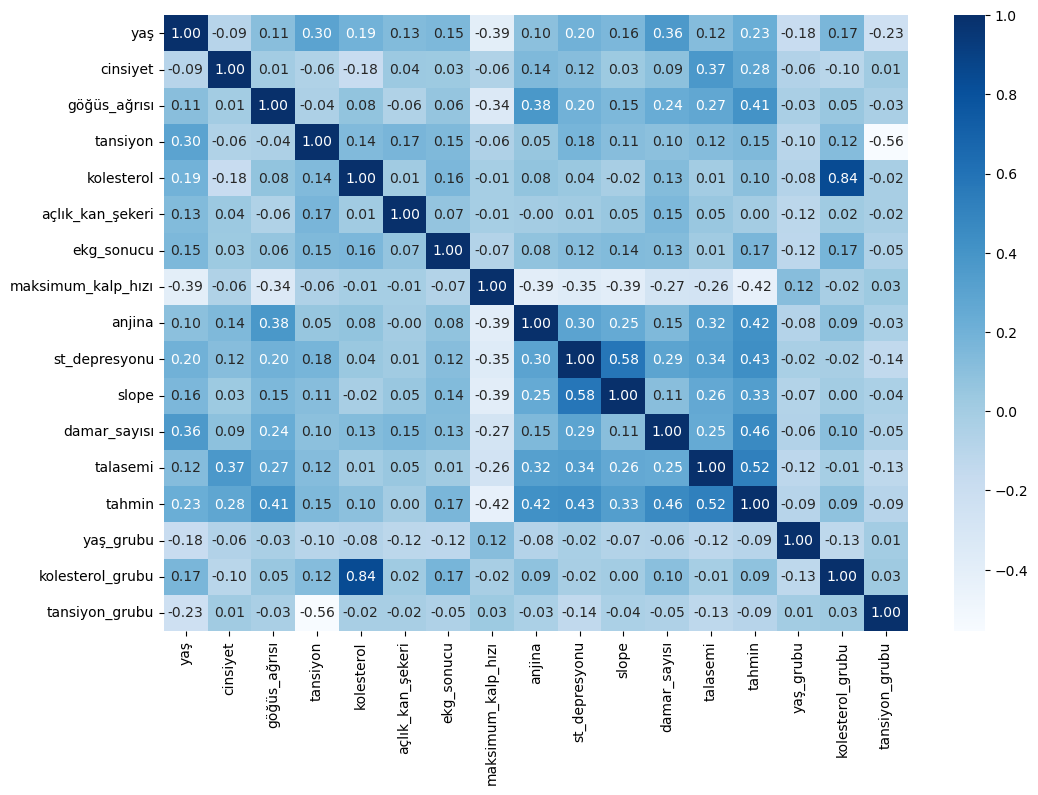

In [569]:
corr_matrix=data_encoded.corr(numeric_only = True)
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr_matrix, annot=True,  fmt = ".2f", cmap='Blues')

In [570]:
# ısı haritasına baktığımızda kalp hasatalığına en çok etki eden değişkenler:göğüs_ağrısı,st_depresyonu,talasemi,anjima, maksimum_kalp_hızı
# düşük değerler ise kolestrol, tansiyon, ekg_sonucu,yaş ve cinsiyet diğerleri kadar etkili görünmüyor.
# bu etkisiz oldukları anlamına gelmiyor tabiki sadece etki düzeyleri farklı
# Başka bir yöntem olan Recursive Feature Elimination yöntemiyle de özelliklerin ağırlıklarına bakacağız.

In [571]:
# dağılımları görmek için grafiklere bakalım

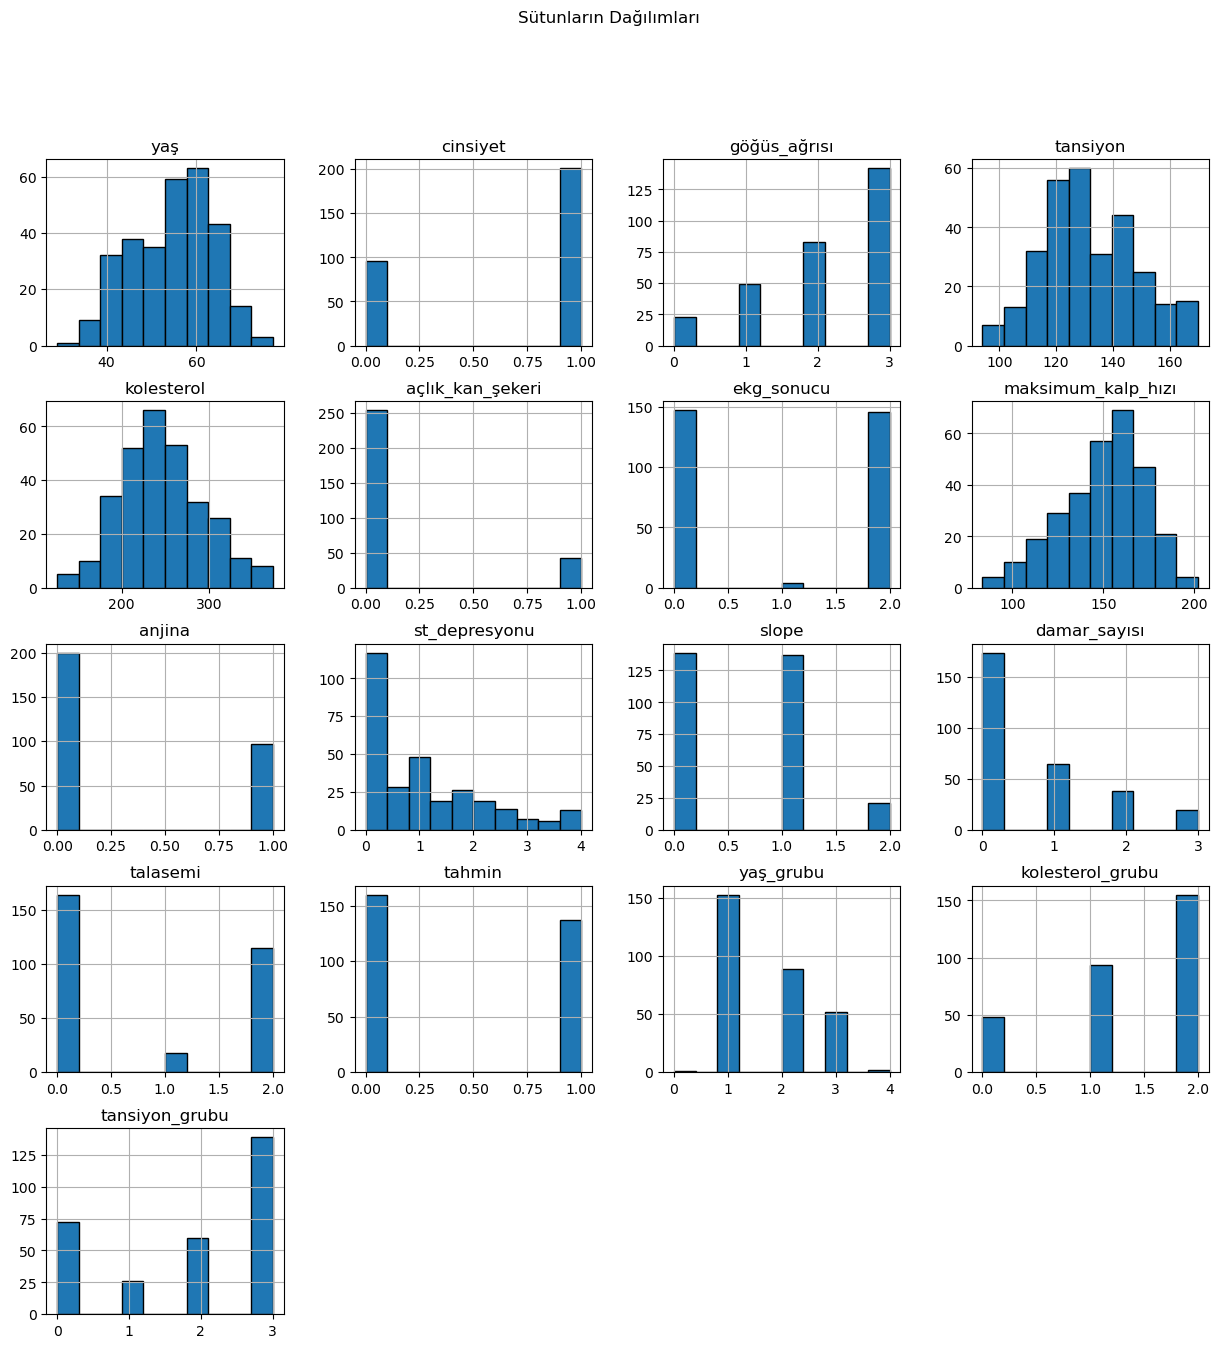

In [572]:
data_encoded.hist(figsize=(15, 15), bins=10, edgecolor='black')
plt.suptitle('Sütunların Dağılımları')
plt.show()

In [573]:
# Standardizasyon ve normalleştirme işlemlerini büyük sayılar üzerinde yapabilir.
# Normal bir dağılımınız varsa veya normale yakın verileriniz varsa, StandardScaler verilerinizi standart normal dağılıma yaklaştırır.
# her veri için gerekli olmayabilir ama kuracağımız modellere etkisni görmek için yaş, kalp atış hızı, tansiyon ve kolestrol üzerinde deneme yapacağız

In [574]:
# Standard Scaler uygulayacağız çünkü verilerimizin dağılımı normal dağılım ya da normal dağılıma yakın

In [575]:
data_scaler=data_encoded.copy()  # standart scaler data

In [576]:
data_encoded_test = data[['kolesterol','tansiyon','maksimum_kalp_hızı','yaş']]

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'Normalizer': Normalizer(norm='l2')
}

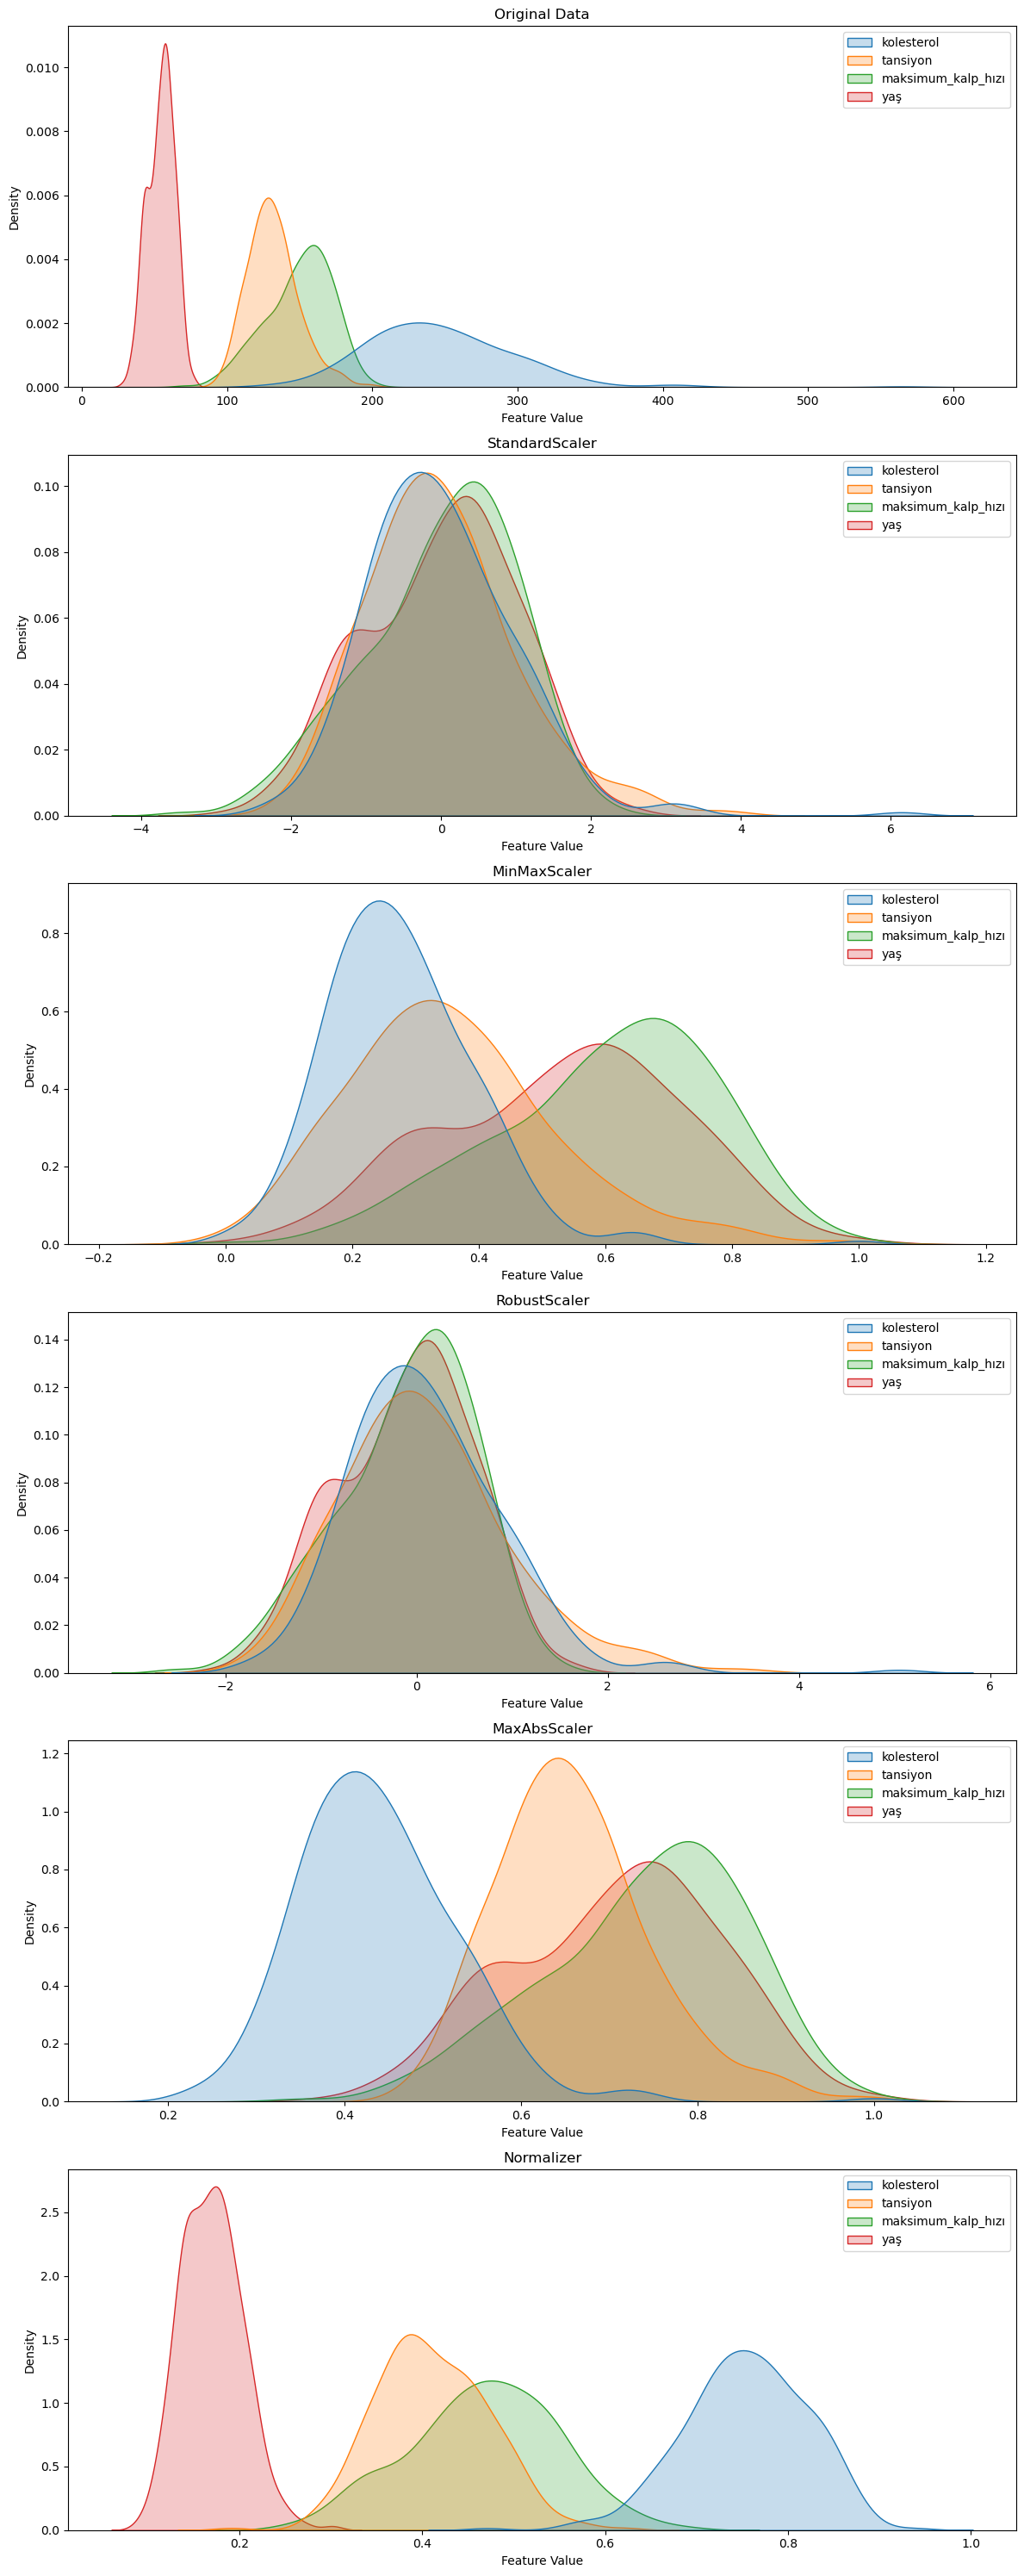

In [577]:
# Scaling ve sonuçların görselleştirilmesi
plt.figure(figsize=(12, 30))
plt.subplot(6, 1, 1)
sns.kdeplot(data=data_encoded_test, fill=True)
plt.title('Original Data')
plt.xlabel('Feature Value')
plt.ylabel('Density')

for i, (key, scaler) in enumerate(scalers.items(), 2):
    scaled_data = scaler.fit_transform(data_encoded_test)
    df_scaled = pd.DataFrame(scaled_data, columns=data_encoded_test.columns)
    
    plt.subplot(6, 1, i)
    sns.kdeplot(data=df_scaled, fill=True)
    plt.title(key)
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    
    
plt.tight_layout()
plt.show()

In [578]:
# Grafiklere baktığımızda standart scaler ve robust scaler dağılımları daha düzgün görünüyor.
# İkisnden birisini seçip devam edebiliriz
# standart sacaler ile devam ediyoruz.

In [579]:
# standarst scale uygulayacağımız sdeğişkenleri seçiyoruz.
kolonlar = ['yaş', 'maksimum_kalp_hızı','kolesterol','tansiyon']

scaler = RobustScaler()

# Sadece seçilen sütunlara standartlaştırma uygulayacağız
scaled = data_scaler.copy()
scaled[kolonlar] = scaler.fit_transform(data_scaler[kolonlar])
data_scaled = scaled.copy()
data_not_scaled = data_encoded.copy()

In [580]:
# BURAYA KADAR EKSİK DEĞERLERİ BULDUK, AYKIRI DEĞERLERİ TEMİZLEDİK, KATEGORİK VE NUMERİK DEĞİŞKENLERİ BULDUK,VERİSETİNE YENİ ÖZELLİKLER EKLEDİK
# HEM LABEL HEM ONE-HOT ENCODİNG UYGULADIK, STANDART SCALER İLE NORMALLEŞTİRME YAPTIK.
# BUNDAN SONRA İSE MODELLER OLUŞTURUP SONUÇLARINA BAKACAĞIZ
# DAHA SONRA İSE OLUŞTURDUĞUMUZ MODELLERİ İYİLEŞTİRMEK İÇİN GEREKLİ İŞLMELERİ YAPACAĞIZ.
# MODELLERİ KURARKEN FARKLI DENEMELER YAPACAĞIZ VE ÇIKAN SONUÇLARI KARŞILAŞTIRACAĞIZ.

In [581]:
data_not_scaled.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
0,63.0,1,0,145,233.0,1,2,150.0,0,2.3,2,0,1,0,2,1,0
1,67.0,1,3,160,286.0,0,2,108.0,1,1.5,1,3,0,1,2,2,1
2,67.0,1,3,120,229.0,0,2,129.0,1,2.6,1,2,2,1,2,1,3
3,37.0,1,2,130,250.0,0,0,187.0,0,3.5,2,0,0,0,3,2,3
4,41.0,0,1,130,204.0,0,2,172.0,0,1.4,0,0,0,0,3,1,3


In [582]:
data_scaled.head()

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,açlık_kan_şekeri,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin,yaş_grubu,kolesterol_grubu,tansiyon_grubu
0,0.538462,1,0,0.75,-0.153846,1,2,-0.090909,0,2.3,2,0,1,0,2,1,0
1,0.846154,1,3,1.50,0.661538,0,2,-1.363636,1,1.5,1,3,0,1,2,2,1
2,0.846154,1,3,-0.50,-0.215385,0,2,-0.727273,1,2.6,1,2,2,1,2,1,3
3,-1.461538,1,2,0.00,0.107692,0,0,1.030303,0,3.5,2,0,0,0,3,2,3
4,-1.153846,0,1,0.00,-0.600000,0,2,0.575758,0,1.4,0,0,0,0,3,1,3


In [583]:
#hedef değişken ile olan korelasyon değerlerine bakarak önemli değişkenleri belirleyebilirsiniz.

correlation_matrix_scaled = data_scaled.corr()
target_correlation = correlation_matrix_scaled['tahmin'].sort_values(ascending=False)
target_correlation

tahmin                1.000000
talasemi              0.520516
damar_sayısı          0.463189
st_depresyonu         0.429836
anjina                0.421355
göğüs_ağrısı          0.408945
slope                 0.333049
cinsiyet              0.278467
yaş                   0.227075
ekg_sonucu            0.166343
tansiyon              0.147765
kolesterol            0.098614
kolesterol_grubu      0.087530
açlık_kan_şekeri      0.003167
yaş_grubu            -0.088673
tansiyon_grubu       -0.091662
maksimum_kalp_hızı   -0.424302
Name: tahmin, dtype: float64

In [584]:
# scale edilmemiş değişkenler üzerinde denersek alacağımız sonuçlara bakalım
correlation_matrix_scaled = data_not_scaled.corr()
target_correlation = correlation_matrix_scaled['tahmin'].sort_values(ascending=False)
target_correlation

tahmin                1.000000
talasemi              0.520516
damar_sayısı          0.463189
st_depresyonu         0.429836
anjina                0.421355
göğüs_ağrısı          0.408945
slope                 0.333049
cinsiyet              0.278467
yaş                   0.227075
ekg_sonucu            0.166343
tansiyon              0.147765
kolesterol            0.098614
kolesterol_grubu      0.087530
açlık_kan_şekeri      0.003167
yaş_grubu            -0.088673
tansiyon_grubu       -0.091662
maksimum_kalp_hızı   -0.424302
Name: tahmin, dtype: float64

In [585]:
# Korelasyon matrixine göre  damar_sayısı, talasemi, st_depresyonu, göğüs_ağrısı, anjina_var ve slope değerleri bizim için önemli değerler
# Bunu sadece eksik verileri arındırılmış veriseti üzerinde yaparsak alcağımız sonuca bakalım

In [586]:
correlation_matrix_dropna = data_dropna.corr()
target_correlation = correlation_matrix_dropna['tahmin'].sort_values(ascending=False)
target_correlation

tahmin                1.000000
talasemi              0.520516
damar_sayısı          0.463189
st_depresyonu         0.424052
anjina                0.421355
göğüs_ağrısı          0.408945
slope                 0.333049
cinsiyet              0.278467
yaş                   0.227075
ekg_sonucu            0.166343
tansiyon              0.153490
kolesterol            0.080285
açlık_kan_şekeri      0.003167
maksimum_kalp_hızı   -0.423817
Name: tahmin, dtype: float64

In [587]:
# bu verisetinde de aynı değişkenleri görüyoruz.
# buradan yapacağımız çıkarım açlık kan şekerinin kalp hastalığı riskine etkisi çok düşük düzeyde. bu değişkeni kaldırabiliriz.
# tansiyon ve kolesterol için ise bir yorumda bulunmak doğru değil
# çünkü bu verisetinde düşük ilişki varken bir önceki verisetinde orta seviye bir ilişki var.
# bu ilişkileri teyit etmek için başka yöntemler deneyeceğiz

In [588]:
X = data_scaled.drop('tahmin',axis=1)
y = data_scaled[['tahmin']]

In [589]:
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y['tahmin'])
X_new

array([[-0.09090909,  0.        ,  2.3       ,  0.        ,  1.        ],
       [-1.36363636,  1.        ,  1.5       ,  3.        ,  0.        ],
       [-0.72727273,  1.        ,  2.6       ,  2.        ,  2.        ],
       ...,
       [-0.36363636,  0.        ,  3.4       ,  2.        ,  2.        ],
       [-1.15151515,  1.        ,  1.2       ,  1.        ,  2.        ],
       [ 0.63636364,  0.        ,  0.        ,  1.        ,  0.        ]])

In [590]:
# En iyi k özelliklerin indekslerini alalım
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 7,  8,  9, 11, 12], dtype=int64)

In [591]:
# Seçilen özelliklerin adlarını alalım
selected_features = X.columns[selected_features_idx]
selected_features

Index(['maksimum_kalp_hızı', 'anjina',
       'st_depresyonu', 'damar_sayısı',
       'talasemi'],
      dtype='object')

In [592]:
# en önemli özellikler maksimum_kalp_hızı, anjina, st_depresyonu, damar_sayısı ve talasemi değişkenleri olarak hesapladık
# değişken sayısını arttırarak daha fazla öneme sahip değişkenleri elde edebiliriz.

In [593]:
# Özelliklerin skorlarını alalım
feature_scores = selector.scores_[selected_features_idx]
feature_scores

array([ 64.77027602,  63.68025335,  66.8561431 ,  80.57786588,
       109.62917142])

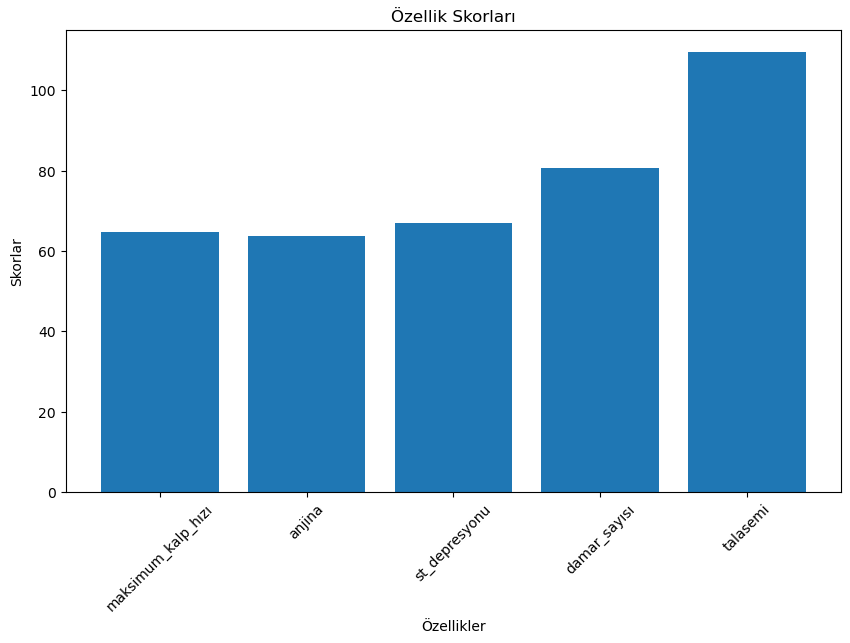

In [594]:
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.xlabel('Özellikler')
plt.ylabel('Skorlar')
plt.title('Özellik Skorları')
plt.xticks(rotation=45)
plt.show()

In [595]:
# Burada ise en önemli 5 değişkenin birbirlerine göre skorlarını görüyoruz.

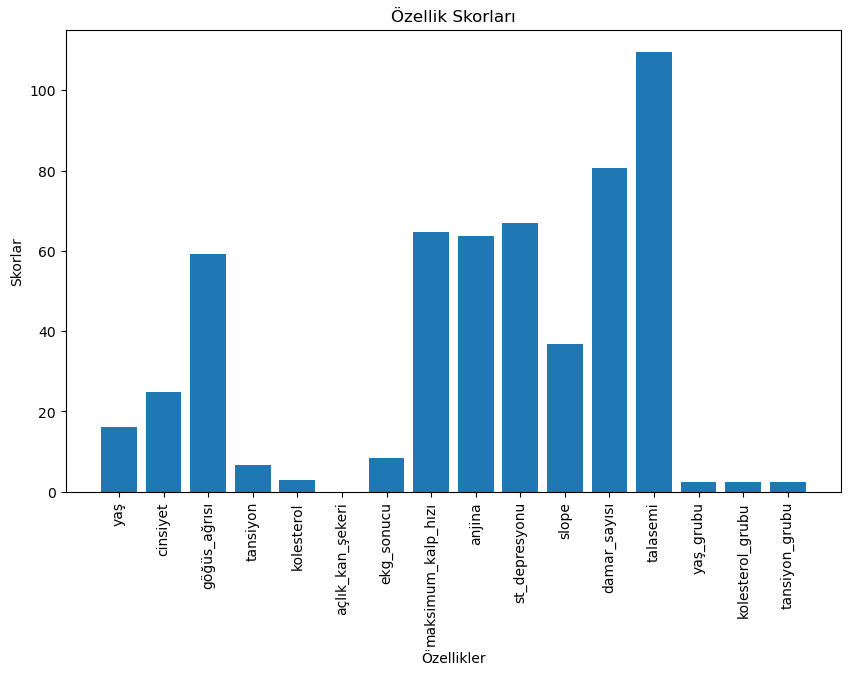

In [596]:
# eğer k değerini bütün sütunları seçecek şekilde genişletirsek grafik üzerinde önemli ve önemsiz değişkenleri görebiliriz
# tüm değişkenleri görmek için yeni değişkenlerle skorları bulduk
selector_tüm_değişkenler = SelectKBest(score_func=f_regression, k=17)
selector_tüm_değişkenler.fit_transform(X, y['tahmin'])
selected_tüm_değişkenler_features_idx = selector_tüm_değişkenler.get_support(indices=True)
selected_tüm_değişkenler_features = X.columns[selected_tüm_değişkenler_features_idx]
feature_tüm_değişkenler_scores = selector_tüm_değişkenler.scores_[selected_tüm_değişkenler_features_idx]

plt.figure(figsize=(10, 6))
plt.bar(selected_tüm_değişkenler_features, feature_tüm_değişkenler_scores)
plt.xlabel('Özellikler')
plt.ylabel('Skorlar')
plt.title('Özellik Skorları')
plt.xticks(rotation=90)
plt.show()

In [597]:
# Grafiğe göre açlık kan şekerinin skoru en düşük iken talasemi en yüksek skorlara sahip. Ayrıca göğüs ağrısı, maksimum kalp hızı,
# anjina, st depresyonu ve damar sayısı değişeknelikleri neredeyse eşit skorlara sahip.
# bu değişkenler lakp hastalığı için önemli değerler demek oluyor.
# ayrıca yeni elde etiiğimiz yaş ,tansiyon ve kolesterol grubu değişkenlerinin de etkileri az olduğu için istersek çıkartabiliriz

In [598]:
print("\nSeçilen Özellikler ve Skorları:")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score}")


Seçilen Özellikler ve Skorları:
maksimum_kalp_hızı: 64.77027602072751
anjina: 63.68025334799909
st_depresyonu: 66.85614310106642
damar_sayısı: 80.57786588101054
talasemi: 109.62917141754514


In [599]:
# en düşük ağırlık açlık_kan_şekeri değişkeni olarak görünüyor !

In [600]:
# değişkenlerin önemini test etmek için birkaç yöntemi daha değerlendireceğiz.

In [601]:
# RFE ile özellik seçimi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma
model = RandomForestClassifier(random_state=42)

# RFE nesnesi oluşturma (örneğin, 5 en iyi özelliği seçmek için)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print("\nRFE Özellik Sıralaması:")
print("Özellikler:", X.columns)
print("Seçim sıralaması:", fit.ranking_)

# Korelasyon analizi
correlation_matrix = data_scaled.corr()

correlation_matrix['tahmin']


RFE Özellik Sıralaması:
Özellikler: Index(['yaş', 'cinsiyet', 'göğüs_ağrısı',
       'tansiyon', 'kolesterol',
       'açlık_kan_şekeri', 'ekg_sonucu',
       'maksimum_kalp_hızı', 'anjina',
       'st_depresyonu', 'slope', 'damar_sayısı',
       'talasemi', 'yaş_grubu',
       'kolesterol_grubu', 'tansiyon_grubu'],
      dtype='object')
Seçim sıralaması: [ 1  7  1  4  3 12  9  1  5  1  6  2  1 10 11  8]


yaş                   0.227075
cinsiyet              0.278467
göğüs_ağrısı          0.408945
tansiyon              0.147765
kolesterol            0.098614
açlık_kan_şekeri      0.003167
ekg_sonucu            0.166343
maksimum_kalp_hızı   -0.424302
anjina                0.421355
st_depresyonu         0.429836
slope                 0.333049
damar_sayısı          0.463189
talasemi              0.520516
tahmin                1.000000
yaş_grubu            -0.088673
kolesterol_grubu      0.087530
tansiyon_grubu       -0.091662
Name: tahmin, dtype: float64

In [602]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yaş                 297 non-null    float64
 1   cinsiyet            297 non-null    int64  
 2   göğüs_ağrısı        297 non-null    int64  
 3   tansiyon            297 non-null    float64
 4   kolesterol          297 non-null    float64
 5   açlık_kan_şekeri    297 non-null    int64  
 6   ekg_sonucu          297 non-null    int64  
 7   maksimum_kalp_hızı  297 non-null    float64
 8   anjina              297 non-null    int64  
 9   st_depresyonu       297 non-null    float64
 10  slope               297 non-null    int64  
 11  damar_sayısı        297 non-null    int64  
 12  talasemi            297 non-null    int64  
 13  tahmin              297 non-null    int64  
 14  yaş_grubu           297 non-null    int32  
 15  kolesterol_grubu    297 non-null    int32  
 16  tansiyon_grub

In [603]:
# burada da yine açlık kan şekeri değerinin skorunu diğer değişkenlere göre çok düşük olduğunu görüyoruz.
# açlık_kan_şekeri değişkenini hem scaled hem de not_scaled verisetinden çıkartıyoruz çünkü sonuçlara etkisinin az olduğu görülüyor.
# iki verisetini de model kurarak değerlendireceğiz. ölçeklendirme ne gibi etki etmiş göreceğiz.
data_scaled.drop(columns=["açlık_kan_şekeri","yaş_grubu","kolesterol_grubu", "tansiyon_grubu"], inplace=True)
data_not_scaled.drop(columns=["açlık_kan_şekeri","yaş_grubu","kolesterol_grubu", "tansiyon_grubu"], inplace=True)

In [604]:
data_scaled.sample(5)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
257,1.538462,0,2,0.5,-0.707692,1,-1.121212,0,1.1,1,0,0,0
220,-1.153846,0,2,-0.9,0.384615,2,0.575758,1,0.0,0,0,0,0
85,-0.923077,1,2,0.5,-0.123077,2,0.818182,0,0.0,0,0,0,0
263,-0.923077,1,2,-0.5,-0.261538,0,0.484848,0,0.0,0,0,0,0
26,0.153846,0,2,-0.5,1.492308,0,0.575758,0,0.0,0,0,0,0


In [605]:
data_not_scaled.sample(5)

,yaş,cinsiyet,göğüs_ağrısı,tansiyon,kolesterol,ekg_sonucu,maksimum_kalp_hızı,anjina,st_depresyonu,slope,damar_sayısı,talasemi,tahmin
35,42.0,1,3,140,226.0,0,178.0,0,0.0,0,0,0,0
64,54.0,1,3,120,188.0,0,113.0,0,1.4,1,1,2,1
278,57.0,1,1,154,232.0,2,164.0,0,0.0,0,1,0,1
136,70.0,1,3,145,174.0,0,125.0,1,2.6,2,0,2,1
183,59.0,1,0,170,270.0,2,145.0,0,4.0,2,0,2,0


In [606]:
# Veri dengesizlği olup olmadığına bakacağız

In [607]:
# Veri setini eğitim ve test setlerine ayırma

# data_not_scale verisetini de ayıracağız ve modeller arasındaki farka bakacağız
X = data_scaled.drop(columns=["tahmin"])
y = data_scaled['tahmin']
X_n = data_not_scaled.drop(columns=["tahmin"])
y_n = data_not_scaled['tahmin']

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# y_train dizisini pandas Serisi'ne dönüştürme
y_train_series = pd.Series(y_train)

# Sınıf dağılımını kontrol etme
class_distribution = y_train_series.value_counts()

print("Sınıf Dağılımı Scaled:\n", class_distribution)


Sınıf Dağılımı Scaled:
 tahmin
0    124
1    113
Name: count, dtype: int64


In [609]:
from collections import Counter

# Sınıf dağılımını kontrol etme
class_distribution = Counter(y_train)

print("Sınıf Dağılımı:\n", class_distribution)


Sınıf Dağılımı:
 Counter({0: 124, 1: 113})


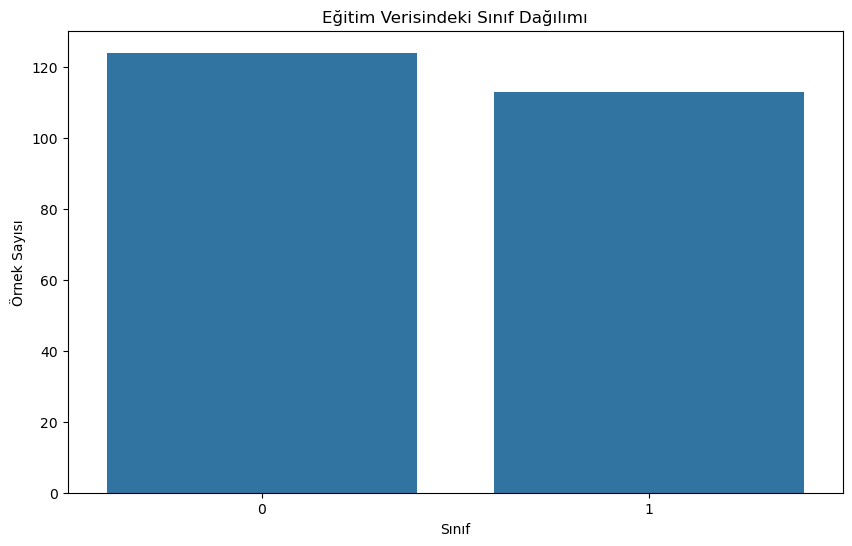

In [610]:
# Sınıf dağılımını pandas DataFrame'e dönüştürme
class_distribution_df = pd.DataFrame({'tahmin': y_train_series})

# Sınıf dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(x='tahmin', data=class_distribution_df)
plt.title('Eğitim Verisindeki Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.show()

In [611]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [612]:
# azınlık sınıfının örnek sayısını artırarak sınıflar arasındaki dengesizliği azaltmak için smote ile oversampling yapacağız.
# SMOTE uygulama
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_n_train_smote, y_n_train_smote = smote.fit_resample(X_n_train, y_n_train)

# scaled ve not scaled verisetlerine oversamling uyguladık
print(f"Oversampling sonrası sınıf sayıları (scaled): {Counter(y_train_smote)}")
print(f"Oversampling sonrası sınıf sayıları (not scaled): {Counter(y_n_train_smote)}")

Oversampling sonrası sınıf sayıları (scaled): Counter({0: 124, 1: 124})
Oversampling sonrası sınıf sayıları (not scaled): Counter({0: 124, 1: 124})


In [613]:
# Burada verilerimizin dengesizliğini ölçüyoruz

Sınıf Dağılımı: Counter({0: 160, 1: 137})


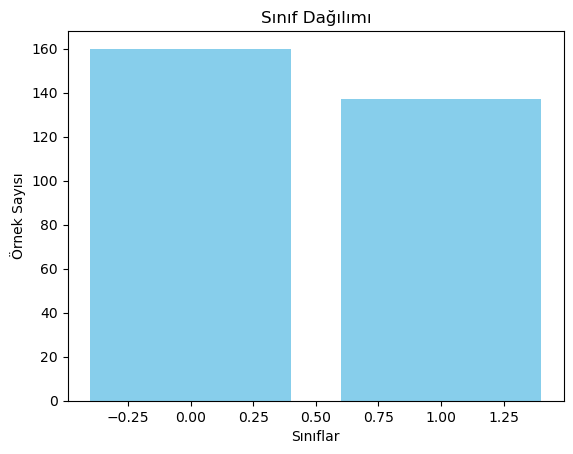

Dengesizlik Oranı: 1.167883211678832


In [614]:
target_variable = 'tahmin'

# Sınıf dağılımını hesaplama
class_counts = Counter(data_scaled[target_variable])
print("Sınıf Dağılımı:", class_counts)

# Sınıf dağılımını görselleştirme
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.title('Sınıf Dağılımı')
plt.show()

# Dengesizlik oranını hesaplama
majority_class = max(class_counts.values())
minority_class = min(class_counts.values())
imbalance_ratio = majority_class / minority_class
print("Dengesizlik Oranı:", imbalance_ratio)


In [615]:
# burada model listesi oluşturuyoruz. önce her modeli verisetlerimizde deneyeceğiz daha sonra yüksek puan alan birkaç model seçip devam edeceğiz

In [616]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=8),
    "SVM": SVC(),
    "Naive Bayes":GaussianNB(),
    "Extra Tree Classifier":ExtraTreeClassifier(),
    "AdaBoost classifier":AdaBoostClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "XBoost":xgb.XGBClassifier()     
}

In [617]:
# 1.scale edilmiş veriseti için modelleme
results = []

# Modelleri eğitip, tahmin yapıyoruz ve skorları hesaplayıyoruz
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    score = model.score(X_test,y_test)    
    accuracy=accuracy_score(y_test, y_pred)
    
    # Sonuçları listeye ekleyoruz
    results.append({
        "Model": model_name,        
        "Score": score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1          
    })

# Listeyi verisetine dönüştürüyoruz
results_df = pd.DataFrame(results)

sorted_results_df = results_df.sort_values(by="Score", ascending=False)
sorted_results_df

,Model,Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.900000,0.900000,0.900000,0.900000,0.900000
4,SVM,0.900000,0.900000,0.900478,0.900000,0.899177
5,Naive Bayes,0.900000,0.900000,0.900478,0.900000,0.899177
7,AdaBoost classifier,0.900000,0.900000,0.903167,0.900000,0.900571
3,KNN,0.883333,0.883333,0.884982,0.883333,0.881778
6,Extra Tree Classifier,0.883333,0.883333,0.897887,0.883333,0.884483
2,Random Forest,0.866667,0.866667,0.866667,0.866667,0.866667
9,XBoost,0.850000,0.850000,0.856566,0.850000,0.851151
8,Gradient Boosting Classifier,0.816667,0.816667,0.818286,0.816667,0.817246
1,Decision Tree,0.800000,0.800000,0.804072,0.800000,0.801143


In [618]:
# 2.scale edilmemiş edilmemiş veriseti için modelleme
results_n = []

# Modelleri eğitip, tahmin yapıyoruz ve skorları hesaplayıyoruz
for model_name, model in models.items():
    model.fit(X_n_train, y_n_train)
    y_n_pred = model.predict(X_n_test)
    
    precision = precision_score(y_n_test, y_n_pred, average='weighted')
    recall = recall_score(y_n_test, y_n_pred, average='weighted')
    f1 = f1_score(y_test, y_n_pred, average='weighted')
    score = model.score(X_n_test,y_n_test)    
    accuracy=accuracy_score(y_n_test, y_n_pred)
    
    # Sonuçları listeye ekleyoruz
    results_n.append({
        "Model": model_name,        
        "Score": score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1          
    })

# Listeyi verisetine dönüştürüyoruz
results_n_df = pd.DataFrame(results_n)

sorted_results_n_df = results_n_df.sort_values(by="Score", ascending=False)
sorted_results_n_df

,Model,Score,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.900000,0.900000,0.900000,0.900000,0.900000
5,Naive Bayes,0.900000,0.900000,0.900478,0.900000,0.899177
7,AdaBoost classifier,0.900000,0.900000,0.903167,0.900000,0.900571
0,Logistic Regression,0.866667,0.866667,0.870136,0.866667,0.867429
9,XBoost,0.850000,0.850000,0.856566,0.850000,0.851151
8,Gradient Boosting Classifier,0.800000,0.800000,0.804072,0.800000,0.801143
1,Decision Tree,0.783333,0.783333,0.790572,0.783333,0.784996
6,Extra Tree Classifier,0.733333,0.733333,0.733333,0.733333,0.733333
3,KNN,0.700000,0.700000,0.695000,0.700000,0.694258
4,SVM,0.650000,0.650000,0.640000,0.650000,0.629060


In [619]:
# 3.smote yapılmış ve scale edilmiş veriseti için modelleme
results_smote = []

# Modelleri eğitip, tahmin yapıyoruz ve skorları hesaplayıyoruz
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred_smote, average='weighted')
    f1 = f1_score(y_test, y_pred_smote, average='weighted')
    score = model.score(X_test,y_test)    
    accuracy=accuracy_score(y_test, y_pred_smote)
    
    # Sonuçları listeye ekleyoruz
    results_smote.append({
        "Model": model_name,        
        "Score": score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1          
    })

# Listeyi verisetine dönüştürüyoruz
results_smote_df = pd.DataFrame(results_smote)

sorted_results_smote_df = results_smote_df.sort_values(by="Score", ascending=False)
sorted_results_smote_df

,Model,Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.900000,0.900000,0.856566,0.900000,0.900571
4,SVM,0.900000,0.900000,0.856566,0.900000,0.899177
3,KNN,0.883333,0.883333,0.856566,0.883333,0.881778
5,Naive Bayes,0.883333,0.883333,0.856566,0.883333,0.882891
2,Random Forest,0.850000,0.850000,0.856566,0.850000,0.850474
7,AdaBoost classifier,0.850000,0.850000,0.856566,0.850000,0.851478
9,XBoost,0.816667,0.816667,0.856566,0.816667,0.818474
8,Gradient Boosting Classifier,0.800000,0.800000,0.856566,0.800000,0.800000
1,Decision Tree,0.766667,0.766667,0.856566,0.766667,0.766667
6,Extra Tree Classifier,0.716667,0.716667,0.856566,0.716667,0.715593


In [620]:
# 4.smote yapılmış ve scale edilmemiş veriseti için modelleme
results_n_smote = []

# Modelleri eğitip, tahmin yapıyoruz ve skorları hesaplayıyoruz
for model_name, model in models.items():
    model.fit(X_n_train_smote, y_n_train_smote)
    y_n_pred_smote = model.predict(X_n_test)
    
    precision = precision_score(y_n_test, y_n_pred, average='weighted')
    recall = recall_score(y_n_test, y_n_pred_smote, average='weighted')
    f1 = f1_score(y_test, y_n_pred_smote, average='weighted')
    score = model.score(X_n_test,y_n_test)    
    accuracy=accuracy_score(y_n_test, y_n_pred_smote)


    # Sonuçları listeye ekleyoruz
    results_n_smote.append({
        "Model": model_name,        
        "Score": score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1          
    })

# Listeyi verisetine dönüştürüyoruz
results_n_smote_df = pd.DataFrame(results_n_smote)

sorted_results_n_smote_df = results_n_smote_df.sort_values(by="Score", ascending=False)
sorted_results_n_smote_df

,Model,Score,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.883333,0.883333,0.856566,0.883333,0.883702
5,Naive Bayes,0.883333,0.883333,0.856566,0.883333,0.882891
0,Logistic Regression,0.866667,0.866667,0.856566,0.866667,0.867429
7,AdaBoost classifier,0.850000,0.850000,0.856566,0.850000,0.851151
9,XBoost,0.816667,0.816667,0.856566,0.816667,0.818073
6,Extra Tree Classifier,0.800000,0.800000,0.856566,0.800000,0.800000
8,Gradient Boosting Classifier,0.800000,0.800000,0.856566,0.800000,0.801143
1,Decision Tree,0.766667,0.766667,0.856566,0.766667,0.768778
3,KNN,0.683333,0.683333,0.856566,0.683333,0.679111
4,SVM,0.616667,0.616667,0.856566,0.616667,0.600926


In [621]:
# Her veri setine bir 'Dataset' sütunu ekleyin
sorted_results_df['Dataset'] = 'Scaled'
sorted_results_n_df['Dataset'] = 'Not Scaled'
sorted_results_smote_df['Dataset'] = 'SMOTE and Scaled'
sorted_results_n_smote_df['Dataset'] = 'SMOTE and Not Scaled'

# Verileri birleştiriyoruz
all_results_df = pd.concat([sorted_results_df, sorted_results_n_df,sorted_results_smote_df, sorted_results_n_smote_df])

# Uzun formata dönüştürme
df_long = pd.melt(all_results_df, id_vars=['Model', 'Dataset'], var_name='Metric', value_name='Value')
df_long
# Pivot tablosu oluşturma
pivot_df = df_long.pivot_table(index='Model', columns=['Metric', 'Dataset'], values='Value')
pivot_df
# Yeni sütun isimlerini düzenleme
pivot_df.columns = [f'{metric} ({dataset})' for metric, dataset in pivot_df.columns]
pivot_df.reset_index(inplace=True)



In [622]:
all_results_df

,Model,Score,Accuracy,Precision,Recall,F1-Score,Dataset
0,Logistic Regression,0.900000,0.900000,0.900000,0.900000,0.900000,Scaled
4,SVM,0.900000,0.900000,0.900478,0.900000,0.899177,Scaled
5,Naive Bayes,0.900000,0.900000,0.900478,0.900000,0.899177,Scaled
7,AdaBoost classifier,0.900000,0.900000,0.903167,0.900000,0.900571,Scaled
3,KNN,0.883333,0.883333,0.884982,0.883333,0.881778,Scaled
6,Extra Tree Classifier,0.883333,0.883333,0.897887,0.883333,0.884483,Scaled
2,Random Forest,0.866667,0.866667,0.866667,0.866667,0.866667,Scaled
9,XBoost,0.850000,0.850000,0.856566,0.850000,0.851151,Scaled
8,Gradient Boosting Classifier,0.816667,0.816667,0.818286,0.816667,0.817246,Scaled
1,Decision Tree,0.800000,0.800000,0.804072,0.800000,0.801143,Scaled


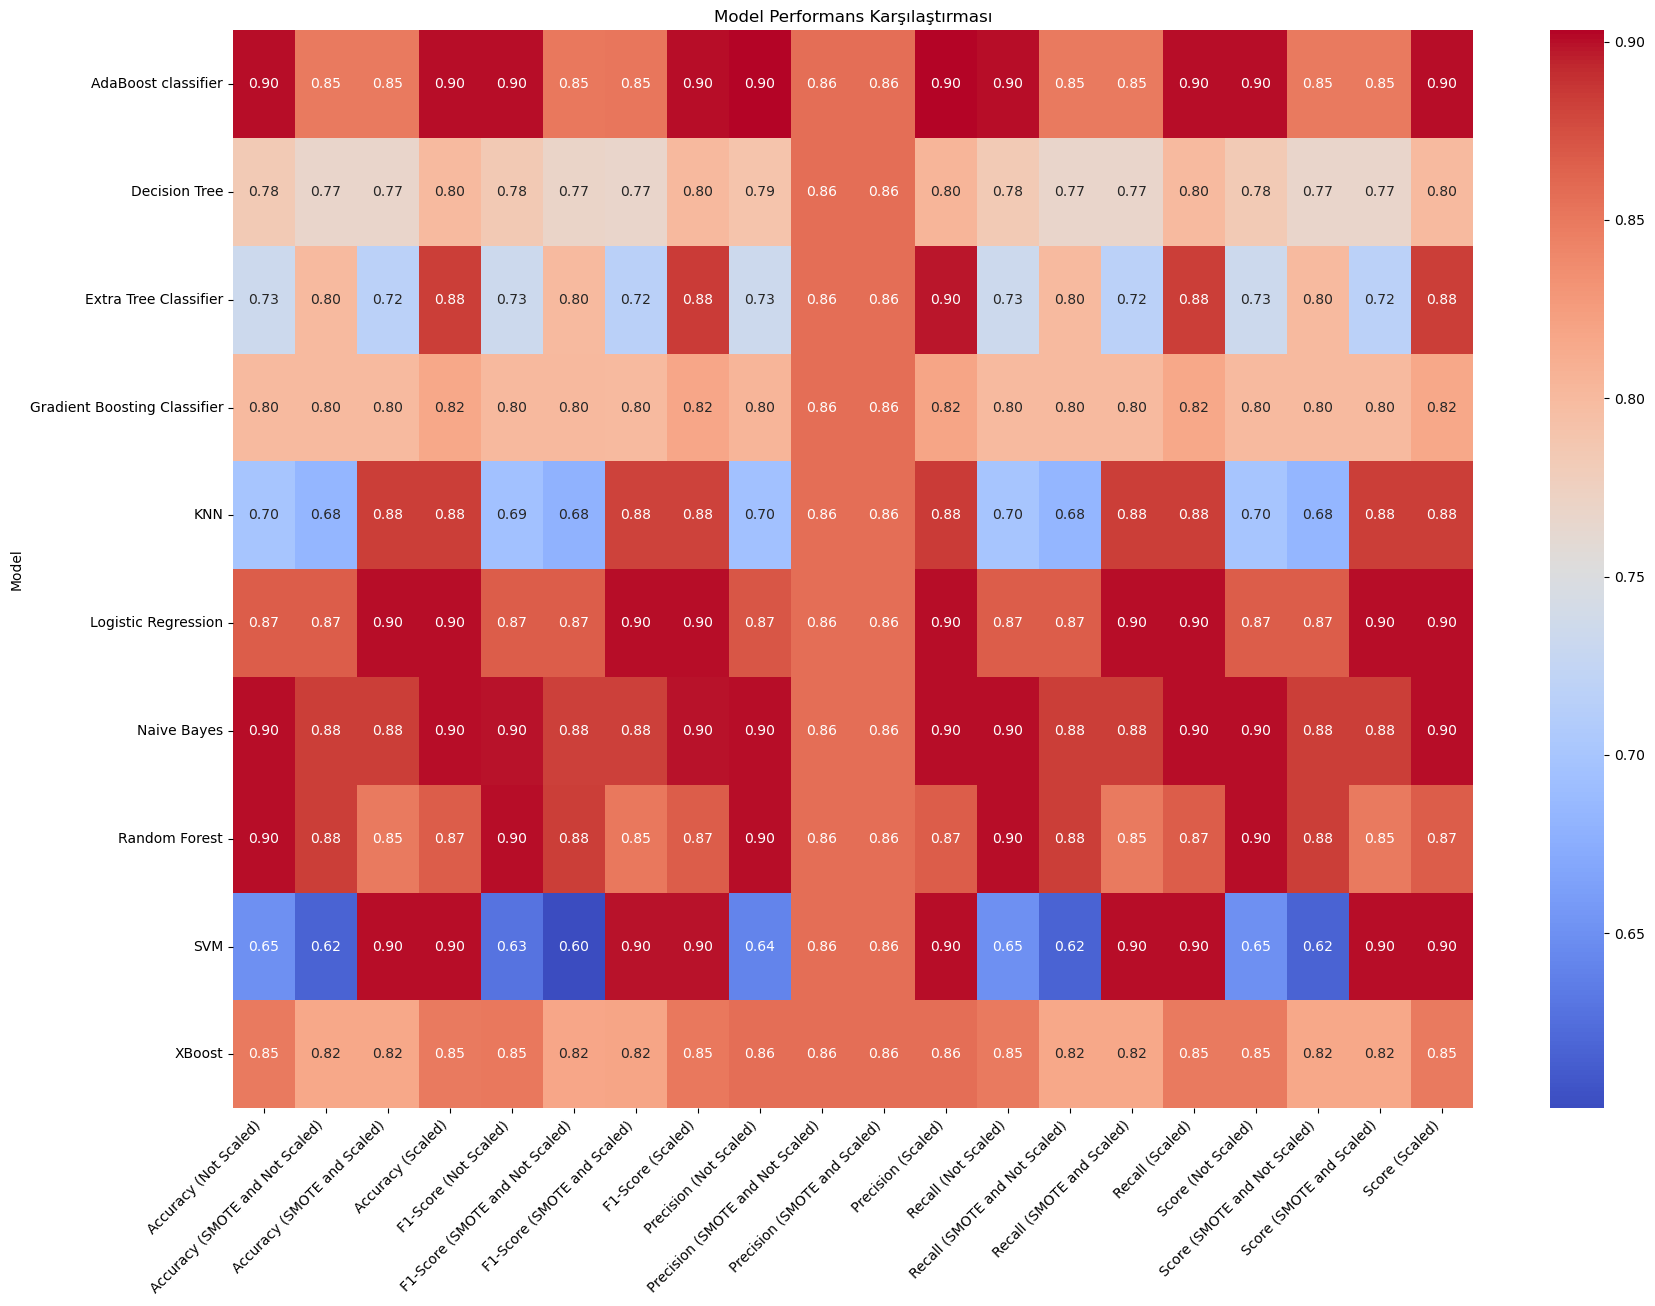

In [623]:
# Bu ısı haritasında hangi modeller hangi verisetleri ile daha iyi çalışmış görebiliriz.
plt.figure(figsize=(20, 14))
sns.heatmap(pivot_df.set_index('Model').astype(float), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Model Performans Karşılaştırması')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

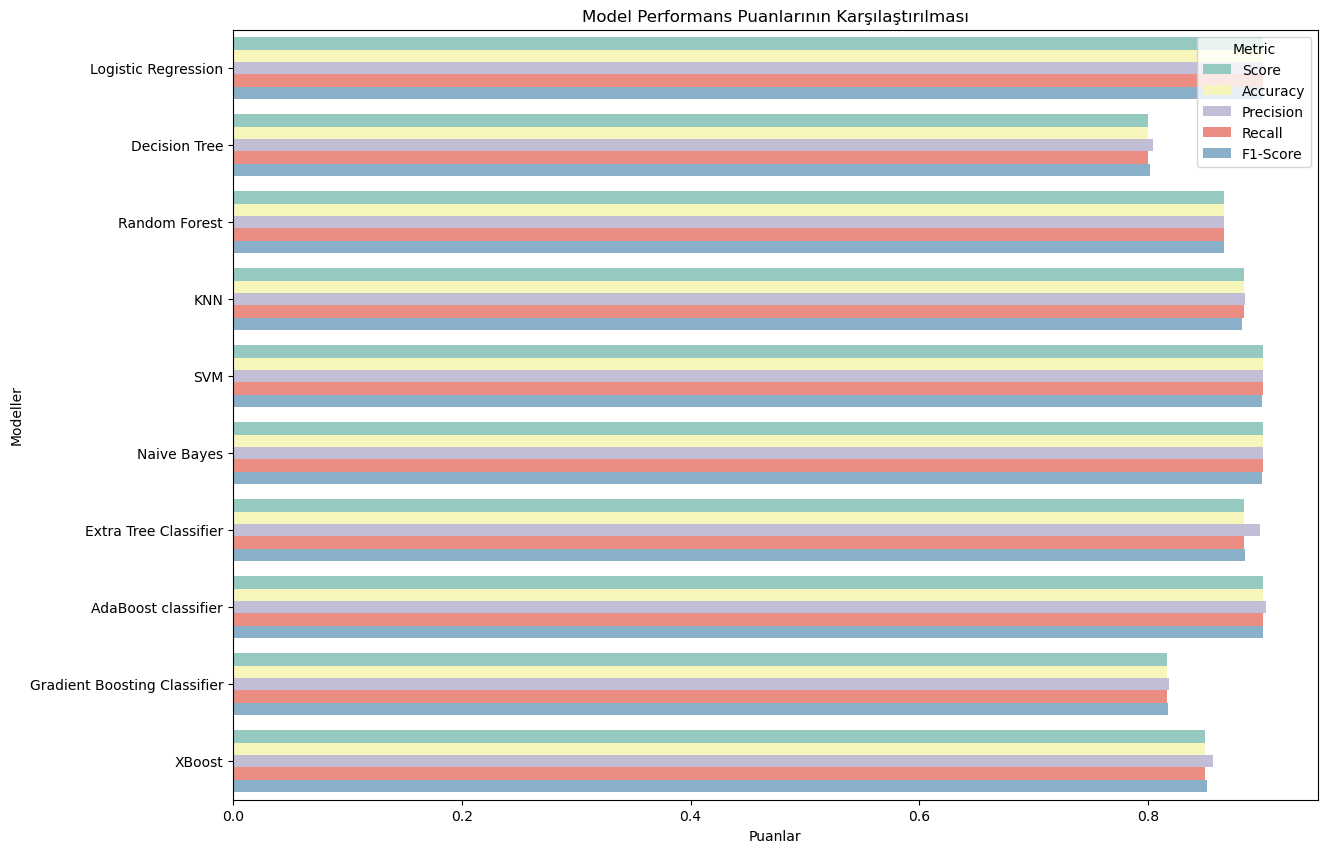

In [624]:
dataset_df = results_df.copy() 

# Veriyi uzun formata dönüştürün
long_df = dataset_df.melt(id_vars='Model', value_vars=['Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 10))
sns.barplot(x='Value', y='Model', hue='Metric', data=long_df, palette="Set3")
plt.title('Model Performans Puanlarının Karşılaştırılması')
plt.xlabel('Puanlar')
plt.ylabel('Modeller')
plt.show()

Logistic Regression AUC Score: 0.95
Decision Tree AUC Score: 0.81
Random Forest AUC Score: 0.93
KNN AUC Score: 0.95
Naive Bayes AUC Score: 0.95
Extra Tree Classifier AUC Score: 0.76
AdaBoost classifier AUC Score: 0.93
Gradient Boosting Classifier AUC Score: 0.88
XBoost AUC Score: 0.90


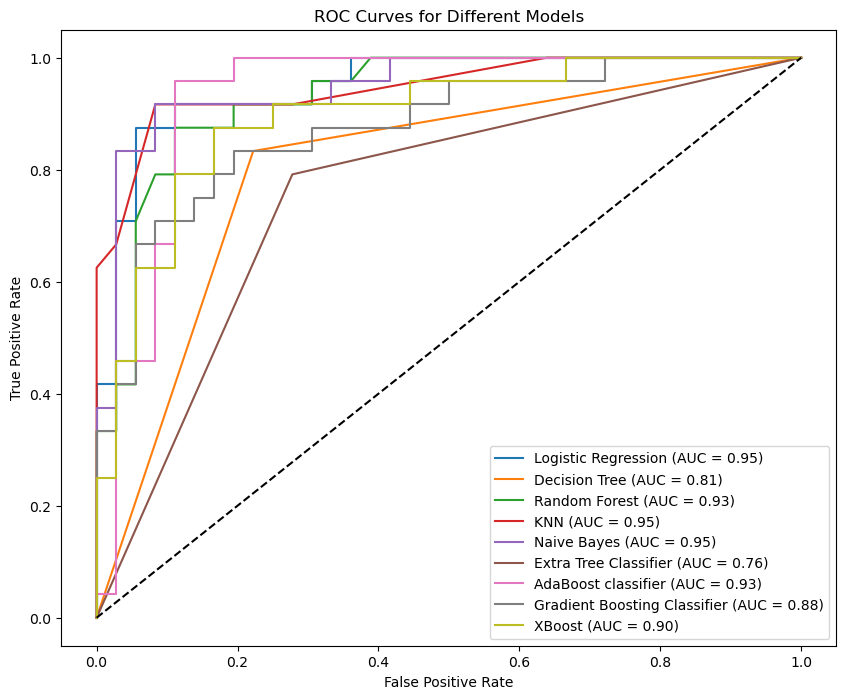

In [625]:
# ROC_AUC Puanların da bakalım
# Her modeli eğit ve AUC skorunu hesapla

modeller = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=8),
    "Naive Bayes":GaussianNB(),
    "Extra Tree Classifier":ExtraTreeClassifier(),
    "AdaBoost classifier":AdaBoostClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "XBoost":xgb.XGBClassifier()     
}

for name, model in modeller.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılıklar
    auc_score = roc_auc_score(y_test, y_probs)
    print(f"{name} AUC Score: {auc_score:.2f}")

# Her model için ROC eğrisi çiz
plt.figure(figsize=(10, 8))

# Her model için ROC eğrisi çiz
for name, model in modeller.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_probs):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

In [626]:
sorted_results_smote_df

,Model,Score,Accuracy,Precision,Recall,F1-Score,Dataset
0,Logistic Regression,0.900000,0.900000,0.856566,0.900000,0.900571,SMOTE and Scaled
4,SVM,0.900000,0.900000,0.856566,0.900000,0.899177,SMOTE and Scaled
3,KNN,0.883333,0.883333,0.856566,0.883333,0.881778,SMOTE and Scaled
5,Naive Bayes,0.883333,0.883333,0.856566,0.883333,0.882891,SMOTE and Scaled
2,Random Forest,0.850000,0.850000,0.856566,0.850000,0.850474,SMOTE and Scaled
7,AdaBoost classifier,0.850000,0.850000,0.856566,0.850000,0.851478,SMOTE and Scaled
9,XBoost,0.816667,0.816667,0.856566,0.816667,0.818474,SMOTE and Scaled
8,Gradient Boosting Classifier,0.800000,0.800000,0.856566,0.800000,0.800000,SMOTE and Scaled
1,Decision Tree,0.766667,0.766667,0.856566,0.766667,0.766667,SMOTE and Scaled
6,Extra Tree Classifier,0.716667,0.716667,0.856566,0.716667,0.715593,SMOTE and Scaled


In [627]:
# bundan sonra bizim için uygun bir model seçip bu model üzerinde performans iyileştirmeleri yapmaya çalışacağız.
# Random Forest, Naive Bayes, Logistic Regression ve AdaBoost Classifier modelleri ile devam edebiliriz. Burada seçim bize kalmış.
# Daha diğer modeli de değerlendirebilriz.
# Bu aşamda Logistic Regression modelini seçiyoruz.
# Scale edilmiş ve SMOTE edilmiş verisetini tek başına değerlendireceğiz

In [628]:
# Bağımsız değişkenler (features) ve bağımlı değişken (target)
X = data_scaled.drop('tahmin', axis=1)
y = data_scaled['tahmin']

In [629]:
## Eğitim ve test setlerine ayır ve SMOTE uygula
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [630]:
# 3 tane en başarılı modeli seçip bu modeller üzerinde verisetimizi eğiteceğiz ve daha sonra performanslarını değerlendireceğiz.

In [631]:
# Logistic Regression  modelini oluştur ve eğit
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [632]:
#  Naive Bayes modelini oluştur ve eğit 
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [633]:
# SVM modelini oluştur ve eğit
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [634]:
####################################################################################################################################

LOGİSTİK REGRESYON MODELİ

In [635]:
# Test seti üzerinde tahmin yap
y_pred = model_logreg.predict(X_test)

# Performans metriklerini hesapla
score_logreg = model_logreg.score(X_test, y_test)
f1_logreg = f1_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
accuracy_logreg = accuracy_score(y_test, y_pred)

print(f'Score: {score_logreg}')
print(f'Accuracy: {accuracy_logreg}')
print(f'F1 Score: {f1_logreg}')
print(f'Precision: {precision_logreg}')
print(f'Recall: {recall_logreg}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Score: 0.9
Accuracy: 0.9
F1 Score: 0.88
Precision: 0.8461538461538461
Recall: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



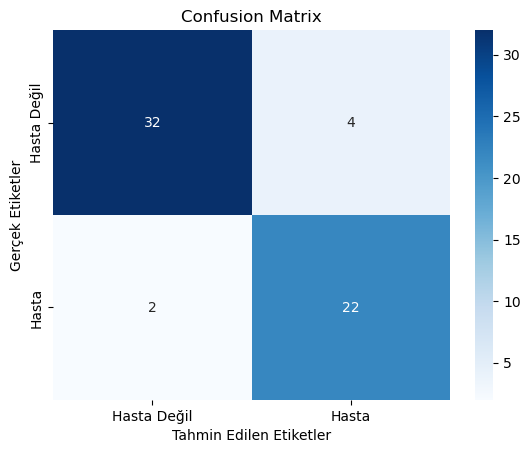

In [636]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [637]:
# Matrisimizi yorumlayalım
# 0-32:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-4: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-2: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-22:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

# Doğruluk: %90, modelinizin genel olarak tahminlerde ne kadar doğru olduğunu gösterir.
# Kesinlik: %88.89, modelinizin pozitif tahminlerinin ne kadar doğru olduğunu gösterir.
# Duyarlılık: %94.12, modelinizin pozitif sınıfları yakalama yeteneğini gösterir. Bu oldukça yüksek bir oran ve modelinizin pozitif sınıfları iyi tahmin ettiğini gösterir.
# F1-Score: %91.43,  modelinizin her iki metrikte de iyi performans gösterdiğini belirtir.


In [638]:
# Burada en uygun cv değeri için deneme yapıyoruz.
# cv değerini en uygun cross validation puanını bulmak için yapıyoruz
# bu işlemleri yapmayıp cv değerine istediğimiz bir değer de atabilirdik.

cv_values = range(2,10) # 2'den 10'a kadar olan kat sayıları alarak farklı en uygun cv değerini arıyoruz
cv_scores = {}

for cv in cv_values:
    scores = cross_val_score(model_logreg, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores[cv] = np.mean(scores)
    print(f"CV={cv} - Mean Accuracy: {np.mean(scores)}")

# En iyi cv değeri
best_cv = max(cv_scores, key=cv_scores.get)
print(f"En iyi CV değeri: {best_cv} - Ortalama Doğruluk: {cv_scores[best_cv]}")

CV=2 - Mean Accuracy: 0.8306451612903226
CV=3 - Mean Accuracy: 0.8185914389264375
CV=4 - Mean Accuracy: 0.8185483870967742
CV=5 - Mean Accuracy: 0.8103673469387754
CV=6 - Mean Accuracy: 0.8145567169957414
CV=7 - Mean Accuracy: 0.806689342403628
CV=8 - Mean Accuracy: 0.814516129032258
CV=9 - Mean Accuracy: 0.8221634332745444
En iyi CV değeri: 2 - Ortalama Doğruluk: 0.8306451612903226


In [639]:
# 2 katlı çapraz doğrulama yap
cv_scores = cross_val_score(model_logreg, X=X_train, y=y_train, cv=2, scoring='accuracy')

# Çapraz doğrulama skorlarını ve ortalama skoru yazdır
print("Çapraz Doğrulama Skorları: ", cv_scores)
print("Ortalama Çapraz Doğrulama Skoru: ", cv_scores.mean())

Çapraz Doğrulama Skorları:  [0.84677419 0.81451613]
Ortalama Çapraz Doğrulama Skoru:  0.8306451612903226


In [640]:
model = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1,1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100,1000],
    'penalty': ['l1', 'l2','elasticnet', 'none'],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [1, 1000]
}

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi hiperparametreler:", best_params)
print("En iyi doğruluk:", best_score)

# En iyi model ile test seti üzerinde değerlendirme
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model performansını değerlendirme
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

En iyi hiperparametreler: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
En iyi doğruluk: 0.842741935483871
Test Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.88      0.92      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



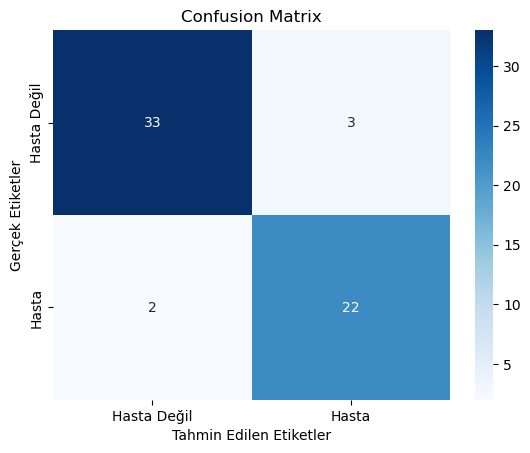

In [641]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [642]:
# Matrisimizi yorumlayalım (Hastalığı doğru tahiminde 1 artış var)
# 0-33:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-3: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-2: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-22:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

In [643]:
####################################################################################################################################

NAIVE BAYES MODELİ

In [644]:
# Test seti üzerinde tahmin yap
y_pred = model_nb.predict(X_test)

# Performans metriklerini hesapla
score_nb = model_nb.score(X_test, y_test)
f1_nb = f1_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred)

print(f'Score: {score_nb}')
print(f'Accuracy: {accuracy_nb}')
print(f'F1 Score: {f1_nb}')
print(f'Precision: {precision_nb}')
print(f'Recall: {recall_nb}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Score: 0.8833333333333333
Accuracy: 0.8833333333333333
F1 Score: 0.851063829787234
Precision: 0.8695652173913043
Recall: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



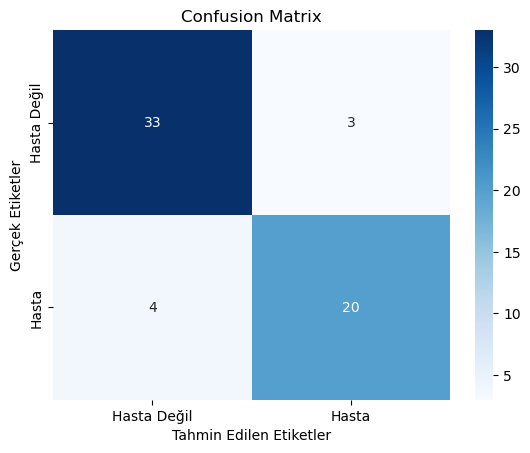

In [645]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [646]:
# Matrisimizi yorumlayalım
# 0-33:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-3: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-4: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-20:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

# Doğruluk: %88.33, modelinizin genel olarak tahminlerde ne kadar doğru olduğunu gösterir.
# Kesinlik: %86.96, modelinizin pozitif tahminlerinin ne kadar doğru olduğunu gösterir.
# Duyarlılık: %83.33, modelinizin pozitif sınıfları yakalama yeteneğini gösterir. Bu oldukça yüksek bir oran ve modelinizin pozitif sınıfları iyi tahmin ettiğini gösterir.
# F1-Score: %85.11,  modelinizin her iki metrikte de iyi performans gösterdiğini belirtir.

In [647]:
# Burada en uygun cv değeri için deneme yapıyoruz.
# cv değerini en uygun cross validation puanını bulmak için yapıyoruz
# bu işlemleri yapmayıp cv değerine istediğimiz bir değer de atabilirdik.

cv_values = range(2,10) # 2'den 10'a kadar olan kat sayıları alarak farklı en uygun cv değerini arıyoruz
cv_scores = {}

for cv in cv_values:
    scores = cross_val_score(model_nb, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores[cv] = np.mean(scores)
    print(f"CV={cv} - Mean Accuracy: {np.mean(scores)}")

# En iyi cv değeri
best_cv = max(cv_scores, key=cv_scores.get)
print(f"En iyi CV değeri: {best_cv} - Ortalama Doğruluk: {cv_scores[best_cv]}")

CV=2 - Mean Accuracy: 0.814516129032258
CV=3 - Mean Accuracy: 0.8144774218826525
CV=4 - Mean Accuracy: 0.8225806451612903
CV=5 - Mean Accuracy: 0.8145306122448981
CV=6 - Mean Accuracy: 0.8305265195509097
CV=7 - Mean Accuracy: 0.8264172335600907
CV=8 - Mean Accuracy: 0.8266129032258064
CV=9 - Mean Accuracy: 0.8302469135802469
En iyi CV değeri: 6 - Ortalama Doğruluk: 0.8305265195509097


In [648]:
model = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=6, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi modeli kullanarak test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model performansını değerlendirme
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation accuracy: 0.83
Test Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



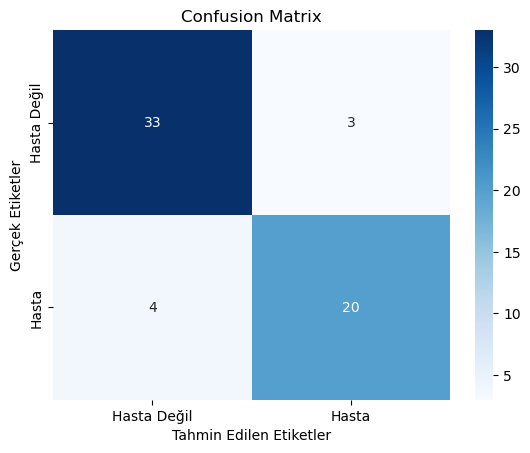

In [649]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [650]:
# Matrisimizi yorumlayalım(değişiklik yok)
# 0-33:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-3: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-4: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-20:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

In [651]:
####################################################################################################################################

SVC MODELİ

In [652]:
# Test seti üzerinde tahmin yap
y_pred = model_svm.predict(X_test)

# Performans metriklerini hesapla
score_svm = model_svm.score(X_test, y_test)
f1_svm = f1_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)

print(f'Score: {score_svm}')
print(f'Accuracy: {accuracy_svm}')
print(f'F1 Score: {f1_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Score: 0.9
Accuracy: 0.9
F1 Score: 0.8695652173913043
Precision: 0.9090909090909091
Recall: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.91      0.83      0.87        24

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



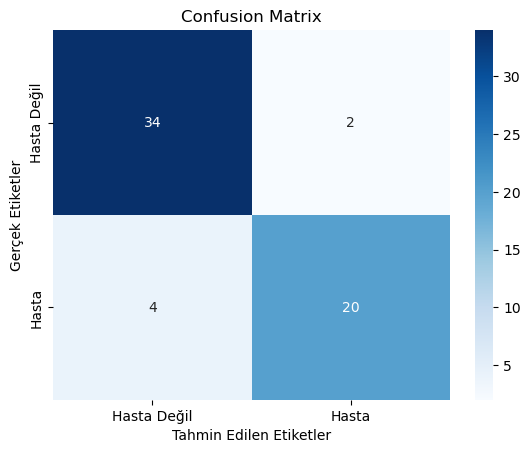

In [653]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [654]:
# Matrisimizi yorumlayalım
# 0-34:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-2: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-4: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-20:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

# Doğruluk: %91, modelinizin genel olarak tahminlerde ne kadar doğru olduğunu gösterir.
# Kesinlik: %90, modelinizin pozitif tahminlerinin ne kadar doğru olduğunu gösterir.
# Duyarlılık: %83, modelinizin pozitif sınıfları yakalama yeteneğini gösterir. Bu oldukça yüksek bir oran ve modelinizin pozitif sınıfları iyi tahmin ettiğini gösterir.
# F1-Score: %87,  modelinizin her iki metrikte de iyi performans gösterdiğini belirtir.

In [655]:
# Burada en uygun cv değeri için deneme yapıyoruz.
# cv değerini en uygun cross validation puanını bulmak için yapıyoruz
# bu işlemleri yapmayıp cv değerine istediğimiz bir değer de atabilirdik.

cv_values = range(2,10) # 2'den 10'a kadar olan kat sayıları alarak farklı en uygun cv değerini arıyoruz
cv_scores = {}

for cv in cv_values:
    scores = cross_val_score(model_svm, X_train, y_train, cv=cv, scoring='accuracy')
    cv_scores[cv] = np.mean(scores)
    print(f"CV={cv} - Mean Accuracy: {np.mean(scores)}")

# En iyi cv değeri
best_cv = max(cv_scores, key=cv_scores.get)
print(f"En iyi CV değeri: {best_cv} - Ortalama Doğruluk: {cv_scores[best_cv]}")

CV=2 - Mean Accuracy: 0.8346774193548387
CV=3 - Mean Accuracy: 0.818542462533059
CV=4 - Mean Accuracy: 0.810483870967742
CV=5 - Mean Accuracy: 0.8106122448979592
CV=6 - Mean Accuracy: 0.7984901277584204
CV=7 - Mean Accuracy: 0.8024943310657596
CV=8 - Mean Accuracy: 0.7983870967741935
CV=9 - Mean Accuracy: 0.7985008818342152
En iyi CV değeri: 2 - Ortalama Doğruluk: 0.8346774193548387


In [656]:
model = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5],  # Poly kernel için
    'coef0': [0.0, 0.1, 0.5, 1],  # Poly ve sigmoid kernel için
    'class_weight': [None, 'balanced']
}

# GridSearchCV kullanarak en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# En iyi modeli kullanarak test setinde tahmin yapma
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model performansını değerlendirme
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters found:  {'C': 0.1, 'class_weight': None, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation accuracy: 0.84
Test Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.95      0.83      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60



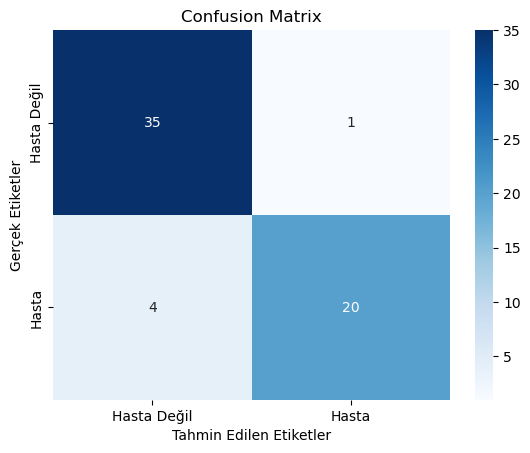

In [657]:
# Confusion Matrix hesapla
conf_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',xticklabels=["Hasta Değil", "Hasta"], yticklabels=["Hasta Değil", "Hasta"])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()

In [658]:
# Matrisimizi yorumlayalım( Hastalığı doğru tahiminde 1 artış var)
# 0-35:  Gerçekten hastalığı olan ve model tarafından doğru bir şekilde hastalıklı olarak tahmin edilen kişi sayısı.
# 0-1: Gerçekten hastalığı olmayan ama model tarafından hastalıklı olarak tahmin edilen kişi sayısı 
# 1-4: Gerçekten hastalığı olan ama model tarafından sağlıklı olarak tahmin edilen kişi sayısı
# 1-20:  Gerçekten hastalığı olmayan ve model tarafından doğru bir şekilde sağlıklı olarak tahmin edilen kişi sayısı.

In [659]:
# Şimdi modellerimizi ne kadar geliştirdiğimize şöyle bir test ile bakalım.
# Orjinal verilerimizin en basit hali olan aykırı değerlerden arındırılmış olan data_outlier verisi
# bu veri setinin puanları ile eğittiğimiz modellerin performans puanlarına bakacağız
# daha sonra ilk ve son model için karşılştırma yapıp model üzerinde yaptığımız geliştirmelerin ne kadar etki ettiğini göreceğiz

In [666]:
X_outlier = data_outlier.drop(columns=["tahmin"])
y_outlier = data_outlier['tahmin']

X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(X_outlier, y_outlier, test_size=0.2, random_state=42)

# 3. Modeli Eğitme
model_outlier = LogisticRegression(random_state=42)  
model_outlier.fit(X_train_outlier, y_train_outlier)

# 4. Tahmin Yapma
y_pred_outlier = model_outlier.predict(X_test_outlier)

# 5. Performans Metriklerini Hesaplama
score_outlier = model_outlier.score(X_test_outlier, y_test_outlier)
f1_outlier = f1_score(y_test_outlier, y_pred_outlier)
precision_outlier = precision_score(y_test_outlier, y_pred_outlier)
recall_outlier = recall_score(y_test_outlier, y_pred_outlier)
roc_auc_outlier = roc_auc_score(y_test_outlier, y_pred_outlier)
accuracy_outlier = accuracy_score(y_test_outlier, y_pred_outlier)

# Performans Metriklerini Yazdırma
print("Performans Metrikleri:")
print(f"Score: {score_outlier}")
print(f"F1 Score: {f1_outlier}")
print(f"Precision: {precision_outlier}")
print(f"Recall: {recall_outlier}")
print(f"Accuracy: {accuracy_outlier}")

# Model performansını değerlendirme
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test_outlier, y_pred_outlier)))
print("Classification Report:\n", classification_report(y_test_outlier, y_pred_outlier))

Performans Metrikleri:
Score: 0.8666666666666667
F1 Score: 0.84
Precision: 0.8076923076923077
Recall: 0.875
Accuracy: 0.8666666666666667
Test Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



In [661]:
# Modellerin hyperparametre ile geliştirilmiş ve normal halleri arasındaki performans farklarına bakacağız.

LOGİSTİK REGRESYON MODELİ İÇİN KARŞILAŞTIRMA SONUÇLARI

Sonuç:
Hiperparametre Uygulanmış Model	, çoğu metrikte normal modelden daha yüksek puanlara sahip. Hiperparametre optimizasyonunun bu durumda performans iyileştirmesi sağlamış ve bazı metriklerde performans artışına yol açmış gibi görünüyor.

NAIVE BAYES MODELİ İÇİN KARŞILAŞTIRMA SONUÇLARI

SVM MODELİ İÇİN KARŞILAŞTIRMA SONUÇLARI

In [662]:
# 3 model içinde karşılaştırma yaparsak Logistic Regresyon modelinin hiperparametre uygulanmış modeli daha iyi performans göstermektedir.
# Hem sınıf 0 hem de sınıf 1 için yüksek precision, recall ve F1-Score değerleri sunuyor.
# Ayrıca, accuracy değeri de oldukça yüksek (0.92), bu nedenle Logistic Regresyon en başarılı model olarak değerlendirilebilir.
# Son olarak oluşturduğumuz modelin performansı ile aykırı değerden arındırılmış en sade verisetinin performansını ölçelim.
# Bu bize verisetinde yaptığımız değişikliklerin modelimiz performansımıza ne kadar etki ettiğini gösterecek.

In [667]:
import pandas as pd

# Hiperparametre Uygulanmış Model ve ilk modelin metrik değerleri
data = {
    'Metric': [
        'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
        'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)',
        'Accuracy'
    ],
    'Aykırı Veri Datası Modeli': [0.91, 0.86, 0.89, 0.81, 0.88, 0.84, 0.87],
    'Logistic Regresyon Modeli': [0.94, 0.92, 0.93, 0.88, 0.92, 0.90, 0.92]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

# Yüzde fark hesaplama
df['Yüzde Fark (%)'] = ((df['Logistic Regresyon Modeli'] - df['Aykırı Veri Datası Modeli']) / df['Aykırı Veri Datası Modeli']) * 100

# Daha yüksek model seçimi
df['Daha Yüksek Model'] = df.apply(lambda row: 'Logistic Regresyon Modeli' if row['Logistic Regresyon Modeli'] > row['Aykırı Veri Datası Modeli'] else ('Aykırı Veri Datası Modeli' if row['Aykırı Veri Datası Modeli'] > row['Logistic Regresyon Modeli'] else 'Eşit'), axis=1)

# Tabloyu yazdırma
df

,Metric,Aykırı Veri Datası Modeli,Logistic Regresyon Modeli,Yüzde Fark (%),Daha Yüksek Model
0,Precision (Class 0),0.91,0.94,3.296703,Logistic Regresyon Modeli
1,Recall (Class 0),0.86,0.92,6.976744,Logistic Regresyon Modeli
2,F1-Score (Class 0),0.89,0.93,4.494382,Logistic Regresyon Modeli
3,Precision (Class 1),0.81,0.88,8.641975,Logistic Regresyon Modeli
4,Recall (Class 1),0.88,0.92,4.545455,Logistic Regresyon Modeli
5,F1-Score (Class 1),0.84,0.90,7.142857,Logistic Regresyon Modeli
6,Accuracy,0.87,0.92,5.747126,Logistic Regresyon Modeli


In [664]:
# Bu tablodan gördğümüz üzere veri üzerinde yaptığımız değişiklikler modelimizin performansını arttırmış.

Hiperparametre uyguladıktan sonra Confusion Matrix inin yorumlarsak, hasta olan 33 kişinin hasta olma durmunu doğru tahmin etmiş. 3 kişi ise hasta değilken hasta olarak tahmin etmiş. 2 kişi gerçekten hasta iken bu kişilere hasta olmadıklarını tahmin etmiş. Hasta olmayan 22 kişiyi de hasta değil olarak tahmin etmiş. Modelin Accuracy (Doğruluk Oranı) %92, Precision (Doğruluk) %88, Recall (Duyarlılık) %92 ve F1-Score %90 dır.
Sonuçlar ve Yorumlama,
    Doğruluk (Accuracy): %92, modelinizin genel olarak yüksek bir doğruluk oranına sahip olduğunu gösterir.
    Precision (Doğruluk): %88, modelin pozitif olarak tahmin ettiği örneklerin çoğunun gerçekten pozitif olduğunu gösterir. 
    Bu, modelin pozitif sınıf için güvenilir olduğunu belirtir.
    Recall (Duyarlılık): %92, modelin gerçek pozitif örneklerin çoğunu doğru tahmin ettiğini gösterir. 
    Bu, modelin pozitif örnekleri kaçırma oranının düşük olduğunu belirtir.
    F1-Score: %90, precision ve recall'ün dengeli bir kombinasyonunu temsil eder. 
    Modeliniz hem pozitif tahminlerde yüksek doğruluk hem de yüksek duyarlılık sağlar.

Genel olarak, modelimiz hem yüksek doğruluk hem de yüksek recall değerlerine sahiptir ve precision da oldukça iyi bir seviyededir. Modeliniz pozitif sınıfı genellikle doğru tahmin ediyor ve hem pozitif hem de negatif sınıflarda başarılı bir performans sergiliyor. Bu metriklere dayanarak, modelinizin dengeli ve etkili bir şekilde çalıştığını söyleyebiliriz.

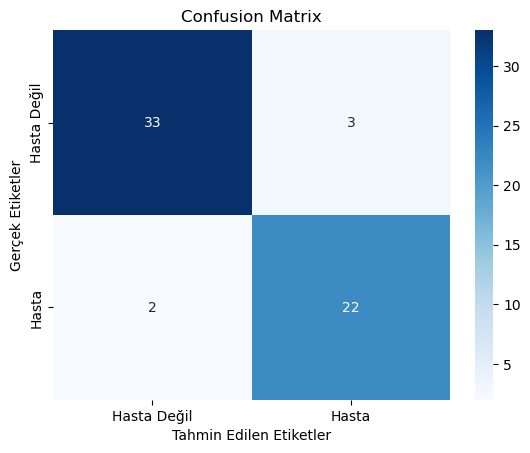